# Initial Setup

In [217]:
# Data Analysis
import numpy as np
import pandas as pd
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import LearningCurveDisplay

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from collections import Counter

# Preprocessing
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from category_encoders import BinaryEncoder

# Machine Learning Algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, make_scorer

# Feature Importance
import shap

# Save Model
import pickle

import warnings
warnings.filterwarnings("ignore")

---

# Business Understanding

#### **A. Context**

Sistem _bike-sharing_ adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh prosesnya, mulai dari _membership_, penyewaan, hingga pengembalian, dilakukan secara otomatis. Melalui sistem ini, _user_ dapat dengan mudah menyewa sepeda dari suatu lokasi tertentu dan mengembalikannya di lokasi lain. Saat ini, terdapat lebih dari 500 program _sharing_ sepeda di seluruh dunia yang terdiri lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena perannya yang penting dalam masalah lalu lintas, lingkungan, dan kesehatan.

Karena pengaplikasiannya yang unik dari sistem berbagi sepeda ini, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk diteliti. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan, dan kedatangan tercatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem _bike-sharing_ menjadi jaringan sensor virtual yang dapat digunakan untuk memantau mobilitas di kota. Oleh karena itu, diharapkan kondisi penting di kota dapat terdeteksi dengan memantau data-data ini.

#### **B. Problem Statement**  

Tantangan terbesar dalam perusahaan pengelola sitem _bike-sharing_ ini adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial bagi pemegang perusahaan, serta dapat memberikan kepuasan terhadap orang-orang yang menggunakan sistem ini. Jumlah sepeda yang disediakan harus sesuai dengan _demand_ (permintaan) _customer_ agar tidak hilang potensi keuntungan dari sistem tersebut.

Karena sistem ini makin populer, maka perusahaan pengelola perlu menyediakan sepeda sesuai dengan tingkat permintaan dari _customer_. Perusahaan perlu mengetahui bagaimana cara untuk dapat memprediksi jumlah sepeda yang perlu mereka sediakan

#### **D. Goals**  

Untuk menentukan jumlah sepeda yang perlu disediakan, akan dibuat model yang dapat memprediksi jumlah sepeda menggunakan fitur seperti waktu, hari libur, tingkat kelembaban, tingkat cuaca, musim, dan temperatur. Berikut adalah target yang spesifik dan terukur:

- Mengembangkan model prediktif yang dapat memprediksi jumlah penyewaan sepeda
- Menggunakan prediksi ini untuk mengoptimalkan distribusi sepeda secara efektif, memastikan ketersediaan sepeda yang memadai di semua lokasi tanpa kelebihan atau kekurangan yang signifikan.

#### **E. Analytic Approach**  

Data historis akan dianalisis untuk diidentifikasi pola di antara _features_, membedakan satu kondisi dari yang lain, dan memahami bagaimana setiap fitur memengaruhi jumlah sepeda yang akan disewa. Pertama akan dilakukan _Exploratory Data Analysis_ (EDA) untuk mendapatkan wawasan tentang kumpulan data, mengidentifikasi korelasi, dan mendeteksi anomali atau outlier apa pun dalam data historis. Ini melibatkan visualisasi distribusi data, pemeriksaan hubungan antara variabel, dan meringkas properti statistik.

Selanjutnya akan dilakukan Data Analysis sederhana untuk memahami dan menginterpretasikan data sehingga kita bisa mendapatkan insight yang berguna. Tahap ini akan menghasilkan feature apa saja yang diduga dapat memengaruhi jumlah sepeda yang akan di sewa. 

Tahap terakhir adalah modeling emnggunakan metode supervised machine learning, dengan model regresi. Dampak dari _features_ yang ada terhadap jumlah sepeda yang disewa akan diperiksa secara khusus. Hal ini melibatkan penggabungan faktor-faktor ini ke dalam model dan mengevaluasi signifikansi dan kontribusinya terhadap akurasi prediksi. Setelah membangun dan memvalidasi model, model tersebut akan digunakan untuk membuat prediksi jumlah sepeda yang akan disewa secara dalam berbagai kondisi.

Terakhir, _insight_ yang diperoleh dari data analysis dan model akan digunakan untuk memberikan rekomendasi yang dapat ditindaklanjuti guna mengoptimalkan distribusi sepeda dan meningkatkan efisiensi sistem secara keseluruhan. Ini akan membantu memastikan bahwa jumlah sepeda yang memadai tersedia setiap saat, sehingga meningkatkan kepuasan pengguna dan efektivitas operasional.

#### **F. Metric Evaluation**  

1. `MAPE`

Metric evaluasi utama yang akan digunakan adalah **MAPE** (Mean Absolute Percentage Error). MAPE digunakan untuk mengukur seberapa akurat prediksi model dalam regresi. _Metric_ ini menghitung rata-rata kesalahan absolut dalam bentuk persentase antara nilai yang diprediksi dan nilai aktual sehingga mudah diinterpretasikan dan dapat menunjukkan seberapa baik model memprediksi target relatif terhadap nilai aktualnya. Nilai MAPE (error) yang lebih rendah artinya akurasi prediksi model lebih baik.

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$$

di mana:
- \( $n$ \) : jumlah sampel.
- \( $y_i$ \) : nilai aktual.
- \( $\hat{y}_i$ \) : nilai prediksi.

2. `RMSE` & `MAE`

Selain MAPE, akan digunakan metrik lain yaitu __RMSE__ (_Root Mean Squared Error_) dan __MAE__ (_Mean Absolute Error_). Metrics tersebut dipakai untuk memberikan gambaran lebih detail yang tidak dapat dilihat hanya pada metric MAPE saja.

Metric MAE akan mengukur rata-rata dari nilai absolut kesalahan antara prediksi dan nilai sebenarnya. Ini memberikan pemahaman langsung tentang kesalahan rata-rata yang diharapkan dalam prediksi jumlah sepeda. MAE memberikan gambaran seberapa jauh prediksi model dari nilai sebenarnya, tanpa memperhitungkan arah kesalahannya (positif atau negatif).
$$

\
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |
\

$$

RMSE memberikan gambaran seberapa jauh nilai prediksi dari nilai aktual dengan menghitung rata-rata kesalahan kuadrat, yang kemudian diambil akarnya. RMSE lebih sensitif terhadap outlier dibandingkan dengan MAE, karena mengkuadratkan kesalahan, yang dapat memberikan penilaian lebih ketat terhadap model yang menghasilkan prediksi yang jauh dari nilai aktual.
$$
\
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\
$$

---

# Data Understanding

- Dataset menggambarkan 12.165 data jumlah sepeda yang disewa menggunakan sistem _bike-sharing_
- Setiap baris merepresentasikan jumlah sepeda yang disewa tiap jamnya dengan karakteristik lingkungan seperti `hum` (kelembaban), `weathersit` ( tingkat cuaca), `season` (musim), `temp` (temperatur), dan informasi lainnya yang diperkirakan dapat memengaruhi jumlah sepeda yang disewa. Berikut detail informasi setiap kolomnya.

In [218]:
# Read Data
data = pd.read_csv('data_bike_sharing.csv', parse_dates=['dteday'])

print(f'Jumlah baris dan kolom: {data.shape}')

# Sortir berdasarkan tanggal dan jam
data = data.sort_values(['dteday', 'hr']).reset_index(drop=True)

# Mengatur urutan kolom
data = data[['dteday', 'hr', 'holiday', 'hum', 'weathersit', 'season', 'temp', 'atemp', 'casual', 'registered', 'cnt']]

# Sampel data
data.sample(10, random_state=55)

Jumlah baris dan kolom: (12165, 11)


,dteday,hr,holiday,hum,weathersit,season,temp,atemp,casual,registered,cnt
6009,2011-12-29,0,0,0.47,2,1,0.22,0.2273,4,24,28
4571,2011-10-01,11,0,0.82,3,4,0.38,0.3939,30,102,132
460,2011-01-31,13,0,0.59,2,1,0.16,0.2273,2,52,54
7499,2012-03-25,9,0,0.94,2,2,0.40,0.4091,26,92,118
8292,2012-05-13,15,0,0.45,1,2,0.72,0.6515,190,309,499
1430,2011-03-30,6,0,0.49,2,2,0.30,0.3030,4,44,48
4400,2011-09-20,22,0,0.94,1,3,0.56,0.5303,23,125,148
6087,2012-01-02,12,1,0.36,1,1,0.28,0.2727,41,161,202
3095,2011-07-05,6,0,0.74,1,3,0.66,0.6212,3,91,94
6316,2012-01-15,8,0,0.54,1,1,0.12,0.1212,2,34,36


**Attribute Information**

| No | Attribute | Data Type | Description | Detail |
| --- | --- | --- | --- | --- |
| 1 | `dteday` | Datetime | Tanggal | - |
| 2 | `hr` | Integer | Jam | - |
| 3 | `holiday` | Integer | Penunjuk hari libur | `0`: hari kerja, <br>`1`: hari libur |
| 4 | `hum` | Float | Kelembaban yang dinormalisasi | - |
| 5 | `weathersit` | Integer |Tingkat cuaca buruk | `1`: Cerah, Sedikit awan, Berawan sebagian;<br>`2`: Kabut + Berawan, Kabut + _Broken clouds_, Kabut + Sedikit awan, Berkabut; <br>`3`: Salju ringan, Hujan ringan + Badai petir + _Scattered clouds_, Hujan ringan + _Scattered clouds_; <br>`4`: Hujan Lebat + Es batu + Badai petir + Kabut, Salju + Kabut. |
| 6 | `season` | Integer | Penunjuk musim | `1`: winter;<br>`2`: spring;<br>`3`: summer;<br>`4`: fall. |
| 7 | `temp` | Float | Temperatur yang dinormalisasi (°C) | $$\frac{(t-t_{min})}{(t_{max}-t_{min})} , t_{min}=-8, t_{max}=+39$$ |
| 8 | `atemp` | Float | Temperatur yang dirasakan dan dinormalisasi (°C) | $$\frac{(t-t_{min})}{(t_{max}-t_{min})} , t_{min}=-16, t_{max}=+50$$ |
| 9 | `casual` | Integer | Jumlah _casual users_ | - |
| 10 | `registered` | Integer |Jumlah _registered users_ | - |
| 11 | `cnt` | Integer | Jumlah total sepeda yang disewa, termasuk _casual_ dan _registered_ | - |

**Initial Assesment**

In [219]:
# Cek tipe data, nilai null, dan nilai unik dari setiap kolom
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,dteday,datetime64[ns],0.0,False,731,"[2011-01-01 00:00:00, 2011-01-02 00:00:00, 201..."
1,hr,int64,0.0,False,24,"[0, 1, 2, 3, 4, 6, 10, 11, 13, 15, 17, 19, 21,..."
2,holiday,int64,0.0,False,2,"[0, 1]"
3,hum,float64,0.0,False,89,"[0.81, 0.8, 0.75, 0.76, 0.72, 0.77, 0.82, 0.88..."
4,weathersit,int64,0.0,False,4,"[1, 2, 3, 4]"
5,season,int64,0.0,False,4,"[1, 2, 3, 4]"
6,temp,float64,0.0,False,50,"[0.24, 0.22, 0.38, 0.36, 0.46, 0.44, 0.42, 0.4..."
7,atemp,float64,0.0,False,65,"[0.2879, 0.2727, 0.3939, 0.3333, 0.4545, 0.439..."
8,casual,int64,0.0,False,305,"[3, 8, 5, 0, 2, 12, 26, 47, 40, 15, 6, 11, 4, ..."
9,registered,int64,0.0,False,742,"[13, 32, 27, 10, 1, 0, 24, 30, 47, 70, 52, 31,..."


> Tidak ada nilai negatif dan _missing value_.

> Kolom `dteday` akan diekstrak menjadi beberapa kolom (`year`, `month`, `day`)

> Kolom `holiday`, `weathersit`, dan `season` akan diubah ke tipe kategorikal agar mudah dianalisis.

In [220]:
# Kolom dteday
data['year'] = data['dteday'].dt.year
data['month'] = data['dteday'].dt.month
data['day'] = data['dteday'].dt.day_of_week

# Kolom Holiday
data['holiday'] = np.where(data['holiday']==1, "Yes", "No")

# Kolom weathersit
conditions_ws = [
    (data['weathersit'] == 1),
    (data['weathersit'] == 2),
    (data['weathersit'] == 3),
    (data['weathersit'] == 4)
]
choices_ws = ['Normal', 'Ringan', 'Buruk', 'Sangat Buruk']
data['weathersit'] = np.select(conditions_ws, choices_ws)

# Kolom season
conditions_season = [
    (data['season'] == 1),
    (data['season'] == 2),
    (data['season'] == 3),
    (data['season'] == 4)
]
choices_season = ['Winter', 'Spring', 'Summer', 'Fall']
data['season'] = np.select(conditions_season, choices_season)

#----------------------------------------------------------------------------------------------------------------------------------------------
# Mengatur ulang urutan kolom
data = data[['dteday', 'year', 'month', 'day', 'hr', 'holiday', 'hum', 'weathersit', 'season', 'temp', 'atemp', 'casual', 'registered', 'cnt']]

In [221]:
data.sample(10, random_state=55)

,dteday,year,month,day,hr,holiday,hum,weathersit,season,temp,atemp,casual,registered,cnt
6009,2011-12-29,2011,12,3,0,No,0.47,Ringan,Winter,0.22,0.2273,4,24,28
4571,2011-10-01,2011,10,5,11,No,0.82,Buruk,Fall,0.38,0.3939,30,102,132
460,2011-01-31,2011,1,0,13,No,0.59,Ringan,Winter,0.16,0.2273,2,52,54
7499,2012-03-25,2012,3,6,9,No,0.94,Ringan,Spring,0.40,0.4091,26,92,118
8292,2012-05-13,2012,5,6,15,No,0.45,Normal,Spring,0.72,0.6515,190,309,499
1430,2011-03-30,2011,3,2,6,No,0.49,Ringan,Spring,0.30,0.3030,4,44,48
4400,2011-09-20,2011,9,1,22,No,0.94,Normal,Summer,0.56,0.5303,23,125,148
6087,2012-01-02,2012,1,0,12,Yes,0.36,Normal,Winter,0.28,0.2727,41,161,202
3095,2011-07-05,2011,7,1,6,No,0.74,Normal,Summer,0.66,0.6212,3,91,94
6316,2012-01-15,2012,1,6,8,No,0.54,Normal,Winter,0.12,0.1212,2,34,36


**Descriptive Statistics**

In [222]:
display(data.describe(), data.describe(include='object'))

,dteday,year,month,day,hr,hum,temp,atemp,casual,registered,cnt
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2012-01-01 02:04:45.869297408,2011.501932,6.510974,3.005261,11.519770,0.625451,0.498185,0.476996,35.834443,153.436580,189.271023
min,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 00:00:00,2011.000000,4.000000,1.000000,6.000000,0.470000,0.340000,0.333300,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,2012.000000,7.000000,3.000000,12.000000,0.620000,0.500000,0.484800,17.000000,115.000000,142.000000
75%,2012-07-03 00:00:00,2012.000000,9.000000,5.000000,18.000000,0.780000,0.660000,0.621200,49.000000,220.000000,282.000000
max,2012-12-31 00:00:00,2012.000000,12.000000,6.000000,23.000000,1.000000,1.000000,1.000000,362.000000,876.000000,970.000000
std,NaN,0.500017,3.433995,1.992993,6.931872,0.192102,0.192492,0.171857,49.489286,151.046123,181.223903


,holiday,weathersit,season
count,12165,12165,12165
unique,2,4,4
top,No,Normal,Summer
freq,11803,8071,3169


##### _Note_

Kolom-kolom yang akan digunakan untuk pemodelan adalah `year`, `month`, `day`, `hr`, `holiday`, `hum`, `weathersit`, `season`, `temp`, dan `cnt`. Kolom `atemp` sudah diwakilkan dengan kolom `temp`, karena akan lebih objektif bila menggunakan temperatur lingkungan daripada temperatur yang dirasakan, walaupun sudah dinormalisasi, nilanya tidak jauh berbeda. Yang menjadi target dalam pemodelah adalah jumlah sepeda yang disewa (`cnt`) sehingga kolom `casual` dan `registered` tidak akan digunakan.

> Untuk melihat hubungan antar kolom akan dilakukan pada bagian selanjutnya.

---

# Exploratory Data Analysis (EDA)

#### 1. `Collinearity` & `Cardinality`

##### a. Collinearity

In [223]:
data.head()

,dteday,year,month,day,hr,holiday,hum,weathersit,season,temp,atemp,casual,registered,cnt
0,2011-01-01,2011,1,5,0,No,0.81,Normal,Winter,0.24,0.2879,3,13,16
1,2011-01-01,2011,1,5,1,No,0.80,Normal,Winter,0.22,0.2727,8,32,40
2,2011-01-01,2011,1,5,2,No,0.80,Normal,Winter,0.22,0.2727,5,27,32
3,2011-01-01,2011,1,5,3,No,0.75,Normal,Winter,0.24,0.2879,3,10,13
4,2011-01-01,2011,1,5,4,No,0.75,Normal,Winter,0.24,0.2879,0,1,1


In [224]:
numerical = ['year', 'month', 'day', 'hr', 'hum', 'temp', 'atemp', 'cnt']

In [225]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

In [226]:
vif_df = calculate_vif(data[numerical])
vif_df

,Feature,VIF
6,atemp,351.295976
5,temp,310.259058
0,year,29.768211
4,hum,14.128794
1,month,5.037692
3,hr,4.606105
2,day,3.285099
7,cnt,3.126791


In [227]:
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [228]:
dropped_columns

['atemp', 'year']

> Kolom `atemp` memiliki tingkat collinearity yang tinggi

In [229]:
numerical = ['year', 'month', 'day', 'hr', 'hum', 'temp', 'cnt']
vif_df = calculate_vif(data[numerical])
vif_df

,Feature,VIF
0,year,28.818041
4,hum,13.972686
5,temp,9.469160
1,month,5.034021
3,hr,4.605983
2,day,3.284557
6,cnt,3.119998


In [230]:
numerical = ['month', 'day', 'hr', 'hum', 'temp', 'cnt']
vif_df = calculate_vif(data[numerical])
vif_df

,Feature,VIF
4,temp,8.101644
3,hum,7.003487
0,month,4.947975
2,hr,3.892729
5,cnt,3.104943
1,day,2.930588


> Kolom `atemp` memiliki nilai vif yang tinggi, artinya memiliki tingkat collinearity yang tinggi, hal ini mengindikasikan adanya korelasi yang tinggi dengan kolom lain.

> Kolom `year` memiliki koefisien vif yang tinggi, namun karena diduga masih dapat memengaruhi penilaian pemodelan, maka feature ini akan tetap dipertahankan

> Walaupun koefisien vif kolom `temp`, `hum`, dan `month` masih diatas 4, karena diduga masih memiliki dampak pada jumlah sepeda yang disewa, maka kolom tersebut akan dipertahankan, selanjutnya akan dicek korelasi dan hubungannya pada _data analysis_.

##### b. Cardinality

In [231]:
categorical = ['holiday', 'weathersit', 'season']

In [232]:
# creating a function to check cardinality
def check_cardinality(data):
    for feature in categorical:
        cardinality = len(data[feature].unique())
        print(f"Cardinality of `{feature}`: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in `{feature}`.\n")

check_cardinality(data)

Cardinality of `holiday`: 2
Cardinality of `weathersit`: 4
Cardinality of `season`: 4


> Tidak ada kolom/_feature_ yang tingkat kardinalitasnya tinggi

#### 2. `Numerical Features`

##### a. **Data Distribution**

In [233]:
data.head(1)

,dteday,year,month,day,hr,holiday,hum,weathersit,season,temp,atemp,casual,registered,cnt
0,2011-01-01,2011,1,5,0,No,0.81,Normal,Winter,0.24,0.2879,3,13,16


In [234]:
from scipy.stats import normaltest

numerical = ['year', 'month', 'day', 'hr', 'hum', 'temp', 'atemp', 'cnt']

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,year,41772.149025,0.000000e+00,Not Normally Distributed
1,month,10367.407342,0.000000e+00,Not Normally Distributed
2,day,16588.101299,0.000000e+00,Not Normally Distributed
3,hr,10639.635208,0.000000e+00,Not Normally Distributed
4,hum,1185.307966,4.108143e-258,Not Normally Distributed
5,temp,2209.877809,0.000000e+00,Not Normally Distributed
6,atemp,1413.453440,1.181640e-307,Not Normally Distributed
7,cnt,2390.417986,0.000000e+00,Not Normally Distributed


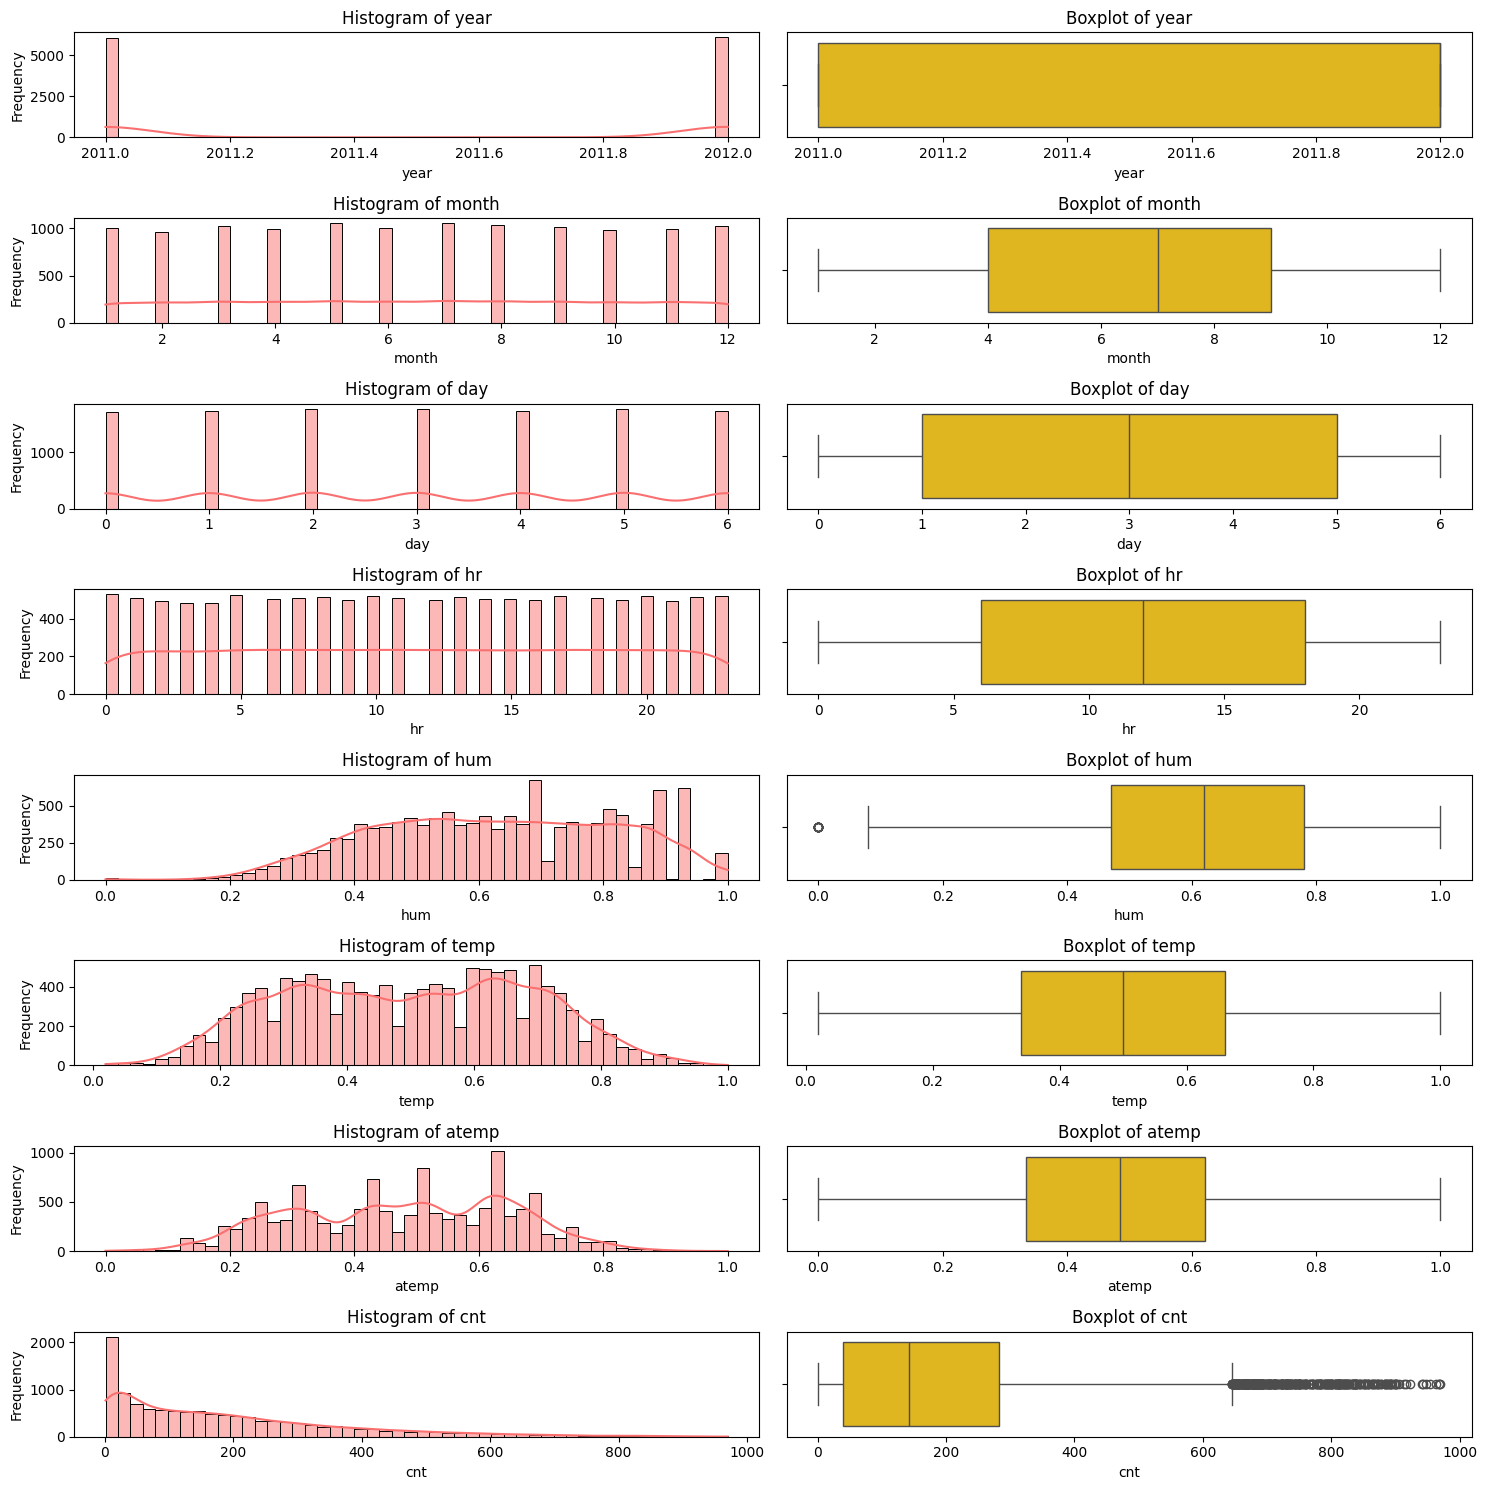

In [235]:
plt.figure(figsize=(15, 15))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

> Semua kolom numerik tidak terdistribusi normal

> Terdapat Outlier di kolom feature `hum` dan target `cnt`

**Skewness Target**

In [236]:
print(f'Koefisien skew pada target (kolom `cnt`): {skew(data["cnt"])}')

Koefisien skew pada target (kolom `cnt`): 1.2675667060947222


> Koefisien skewness bernilai positif dan diatas 1 artinya kolom target sangat skewed ke kanan

##### b. **Correlation**

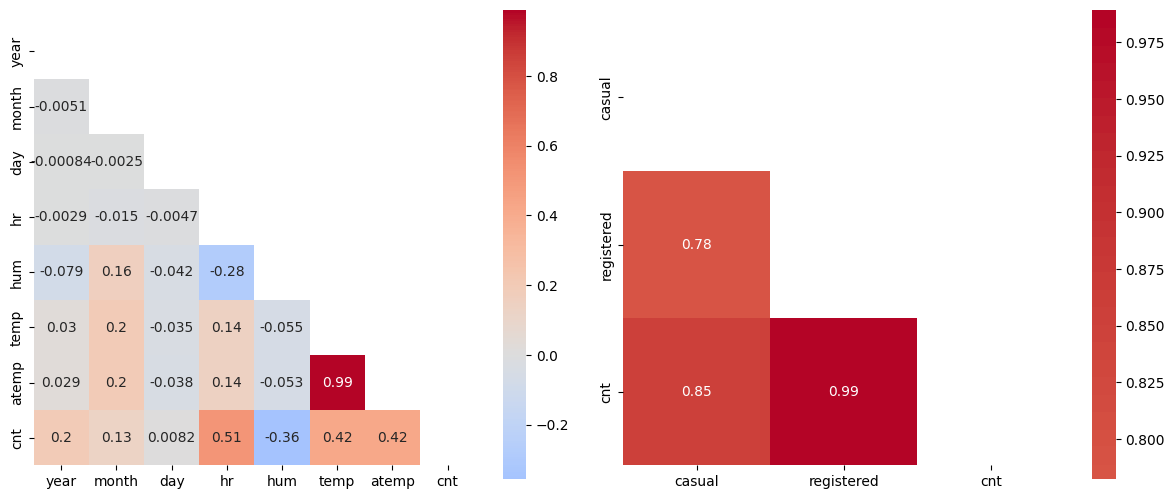

In [237]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))

# Feature Correlation
matrix_f = np.triu(data[numerical].corr(method='spearman'))
sns.heatmap(data=data[numerical].corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask=matrix_f, square='True', ax=ax[0])

# Target
matrix_t = np.triu(data[['casual', 'registered', 'cnt']].corr(method='spearman'))
sns.heatmap(data=data[['casual', 'registered', 'cnt']].corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask=matrix_t, square='True', ax=ax[1])

plt.tight_layout()
plt.show()

> Kolom `atemp` berkorelasi kuat dengan kolom `temp`, karena nilainya yang relatif sama.

> Kolom `casual` dan `registered` berkorelasi kuat dengan kolom `cnt`, karena kolom tersebut (`cnt`) merupakan jumlah dari kedua kolom sebelumnya (`casual` & `registered`).

> Kolom yang paling berkorelasi tinggi dengan target (`cnt`) adalah `hr`, diikuti `temp` dan `hum`.

#### 3. `Categorical Features`

Tahap ini dilakukan untuk melihat sebaran data kolom bertipe kategorikal dalam bentuk proporsi dan frekuensinya dari dataset.

In [238]:
# Remove garis tepi atas dan kanan
def despine(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    return ax

##### a. Kolom `holiday`

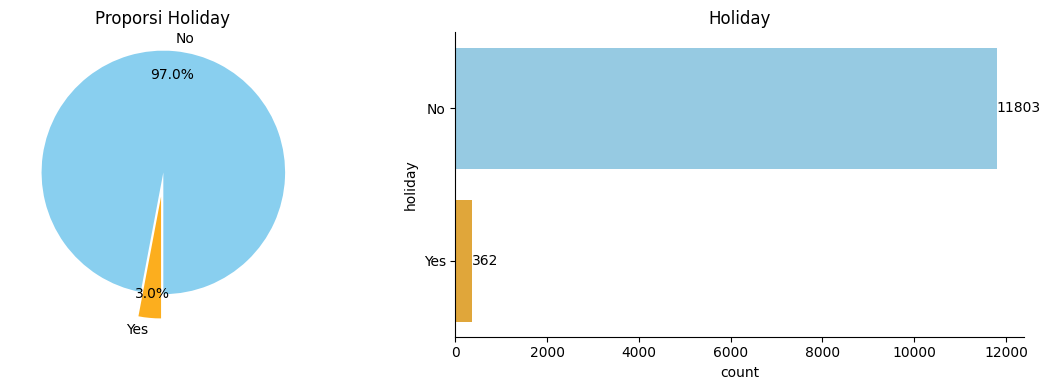

In [239]:
# Figure
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Piechart
ax[0].pie(
    data['holiday'].value_counts(),
    labels = data['holiday'].unique(),
    autopct='%1.1f%%',
    colors = ['#89CFEF', '#FCAE1E'],
    startangle =270,
    pctdistance=0.8,
    explode=[0.1, 0.1]
)
ax[0].set_title('Proporsi Holiday')

# Countplot
sns.countplot(
    data=data,
    y='holiday',
    palette=['#89CFEF', '#FCAE1E'],
    ax=ax[1])
ax[1].set(title='Holiday')

for bar in ax[1].patches:
    x, y = bar.get_xy()
    ax[1].text(
        x + bar.get_width(), 
        y + bar.get_height()/2, 
        f'{bar.get_width():.0f}',
        va='center', ha='left', color='black'
    )

# Hapus garis tepi
despine(ax[1])

plt.tight_layout()
plt.show()

Insight:
- Proporsi hari libur selama 2 tahun (dataset) sangat kecil

##### b. Kolom `weathersit`

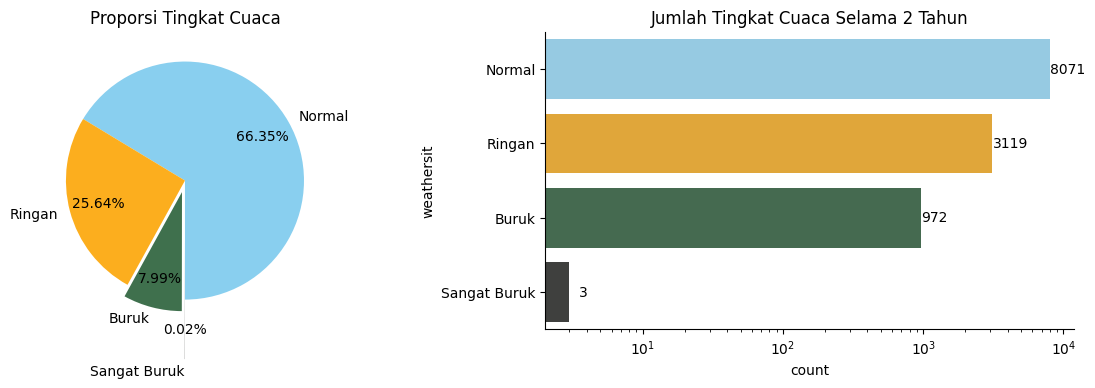

In [240]:
# Figure
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Piechart
ax[0].pie(
    data['weathersit'].value_counts(),
    labels = data['weathersit'].unique(),
    autopct='%1.2f%%',
    colors = ['#89CFEF', '#FCAE1E', '#3F704D', '#3F403E'],
    startangle =270,
    pctdistance=0.75,
    explode=[0, 0, 0.1, 0.5]
)
ax[0].set_title('Proporsi Tingkat Cuaca')

# Countplot
sns.countplot(
    data=data,
    y='weathersit', 
    palette=['#89CFEF', '#FCAE1E', '#3F704D', '#3F403E'], 
    ax=ax[1])
ax[1].set_title('Jumlah Tingkat Cuaca Selama 2 Tahun')

for bar in ax[1].patches:
    x, y = bar.get_xy()
    ax[1].text(
        x + bar.get_width() + 0.5, 
        y + bar.get_height()/2, 
        f'{bar.get_width():.0f}',
        va='center', ha='left', color='black'
    )
# Atur skala xaxis agar mudah dipahami ketika dianalisis
plt.xscale('log')   # Skala logaritmik

despine(ax[1])
plt.tight_layout()

plt.show()

Insight:
- Dalam 2 tahun tersebut, orang-orang menghindari menyewa sepeda ketika tingkat cuacanya buruk dan sangat buruk

##### c. Kolom `season`

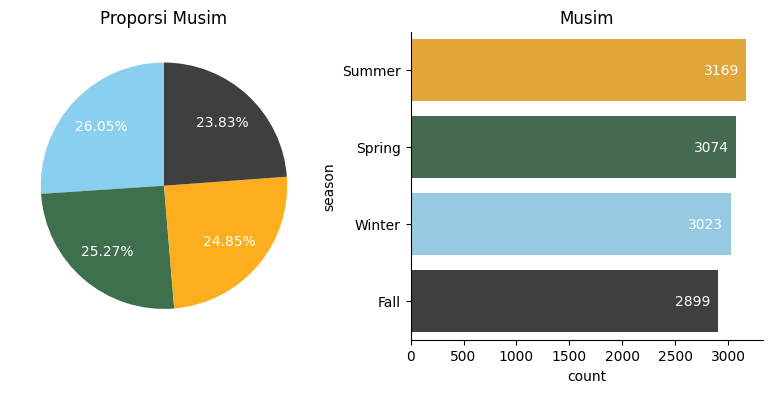

In [241]:
# Figure
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# Piechart
ax[0].pie(
    data['season'].value_counts(),
    labels = data['season'].unique(),
    autopct='%1.2f%%',
    colors = ['#89CFEF', '#3F704D', '#FCAE1E', '#3F403E'],
    startangle =90,
    pctdistance=0.7,
    textprops={'color': 'white'}
)
ax[0].set_title('Proporsi Musim')

# Countplot
order = data['season'].value_counts().index
sns.countplot(
    data=data, 
    y='season', 
    palette=['#FCAE1E', '#3F704D', '#89CFEF', '#3F403E'], 
    order=order, 
    ax=ax[1])
ax[1].set_title('Musim')

# label
for bar in ax[1].patches:
    x, y = bar.get_xy()
    ax[1].text(
        x + bar.get_width()-400,
        y + bar.get_height()/2,
        f'{bar.get_width():.0f}',
        va='center', ha='left', color='white'
    )

# Hapus garis tepi
despine(ax[1])

plt.show()

Insight:
- Tidak terlihat ada perbedaan yang cukup signifikan dari proporsi musim dalam 2 tahun dari dataset

---

# Data Cleaning, Feature Selection and Feature Engineering

#### 1. Check Missing Values

In [242]:
pd.DataFrame(data.isna().sum(), columns=['Value'])

,Value
dteday,0
year,0
month,0
day,0
hr,0
holiday,0
hum,0
weathersit,0
season,0
temp,0


> Tidak ada _Missing Value_

#### 2. Check Data Duplicates

In [243]:
data[data.duplicated()]

,dteday,year,month,day,hr,holiday,hum,weathersit,season,temp,atemp,casual,registered,cnt


In [244]:
print(f"Jumlah duplikasi data: {data[data.duplicated()].shape}")
print(f'Persentase sebesar {len(data[data.duplicated()])/len(data)*100:.2f}%')

Jumlah duplikasi data: (0, 14)
Persentase sebesar 0.00%


In [245]:
data.drop_duplicates(inplace=True, ignore_index=True)

> Duplikasi dihapus agar model yang akan dibuat tidak terlalu mempelajari data yang sama (Overfitting)

#### 4. Generate New Features

Features tambahan yang akan digunakan diekstrak dari kolom `dteday` yang sudah dilakukan pada tahap awal. Kolom baru yang digunakan adalah sebagai berikut
- `year`
- `month`
- `day`

#### 5. Remove Irrelevant Features

In [246]:
data.head()

,dteday,year,month,day,hr,holiday,hum,weathersit,season,temp,atemp,casual,registered,cnt
0,2011-01-01,2011,1,5,0,No,0.81,Normal,Winter,0.24,0.2879,3,13,16
1,2011-01-01,2011,1,5,1,No,0.80,Normal,Winter,0.22,0.2727,8,32,40
2,2011-01-01,2011,1,5,2,No,0.80,Normal,Winter,0.22,0.2727,5,27,32
3,2011-01-01,2011,1,5,3,No,0.75,Normal,Winter,0.24,0.2879,3,10,13
4,2011-01-01,2011,1,5,4,No,0.75,Normal,Winter,0.24,0.2879,0,1,1


Dari hasil exploratory data yang telah dilakukan feature yang tidak akan digunakan pada pemodelan adalah sebagai berikut
- `dteday`;
- `atemp`;
- `casual`; dan
- `registered`

#### 6. Handling Outliers

In [247]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in data.columns if data[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,dteday,0,0.00,2009-12-28 12:00:00,2014-01-04 12:00:00
1,year,0,0.00,2009.5,2013.5
2,month,0,0.00,-3.5,16.5
3,day,0,0.00,-5.0,11.0
4,hr,0,0.00,-12.0,36.0
5,hum,14,0.12,0.005,1.245
6,temp,0,0.00,-0.14,1.14
7,atemp,0,0.00,-0.09855,1.05305
8,casual,847,6.96,-63.5,116.5
9,registered,470,3.86,-245.0,499.0


In [248]:
data[data['hum']==0]

,dteday,year,month,day,hr,holiday,hum,weathersit,season,temp,atemp,casual,registered,cnt
1094,2011-03-10,2011,3,3,0,No,0.0,Buruk,Winter,0.34,0.3182,3,0,3
1095,2011-03-10,2011,3,3,1,No,0.0,Buruk,Winter,0.34,0.3182,0,2,2
1096,2011-03-10,2011,3,3,6,No,0.0,Buruk,Winter,0.36,0.3333,0,12,12
1097,2011-03-10,2011,3,3,7,No,0.0,Buruk,Winter,0.38,0.3939,1,36,37
1098,2011-03-10,2011,3,3,8,No,0.0,Buruk,Winter,0.38,0.3939,1,43,44
1099,2011-03-10,2011,3,3,9,No,0.0,Buruk,Winter,0.40,0.4091,1,23,24
1100,2011-03-10,2011,3,3,11,No,0.0,Buruk,Winter,0.40,0.4091,6,5,11
1101,2011-03-10,2011,3,3,12,No,0.0,Buruk,Winter,0.42,0.4242,4,30,34
1102,2011-03-10,2011,3,3,13,No,0.0,Buruk,Winter,0.42,0.4242,1,11,12
1103,2011-03-10,2011,3,3,15,No,0.0,Buruk,Winter,0.44,0.4394,3,11,14


In [249]:
print(f'Proporsi outlier pada kolom `hum`: {len(data[data["hum"]==0])/len(data)*100:.3f}%')

Proporsi outlier pada kolom `hum`: 0.115%


Informasi yang didapat dari visualisasi data dan pengecekan nilai outlier, hanya kolom `hum` yang memiliki outlier sebanyak 14 data, dengan proporsi 0,115%. Tingkat _humidity_ di bumi tidak akan mencapai angka 0 walaupun kondisi lingkungan sekitar kering/gersang, sehingga akan dilakukan drop data pada pemodelan.

In [250]:
data.drop(data[data['hum']==0].index, inplace=True)

---

# Data Analysis

#### 1. Numerical Variables (`hum`, `temp`, `year`) vs Target (`cnt`)

##### a. Kolom `hum` vs `cnt`

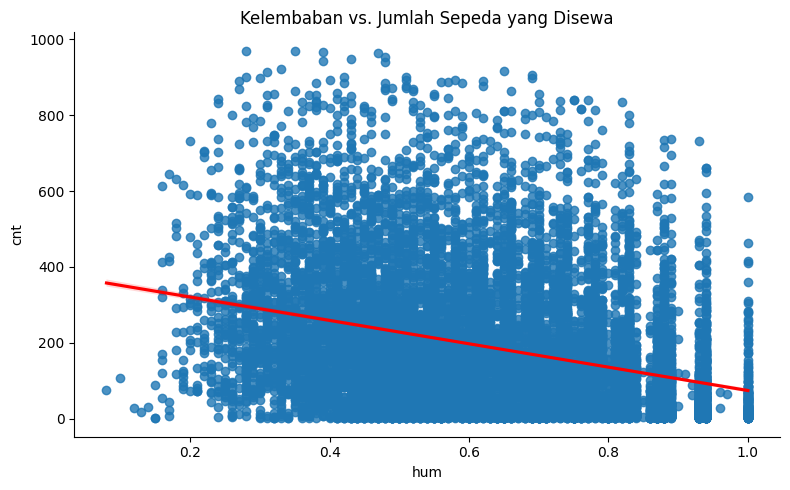

In [251]:
# Figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot
sns.regplot(data=data, x='hum', y='cnt', ax=ax, line_kws={"color": "red"})

# Label
ax.set(
    title='Kelembaban vs. Jumlah Sepeda yang Disewa',
    xlabel='hum',
    ylabel='cnt'
)

# Hapus garis tepi
despine(ax)

# Visualisasi
plt.tight_layout()
plt.show()

Insight:
- Semakin tinggi tingkat kelebaban, semakin rendah jumlah sepeda yang disewa

> Ada anomali pada kolom `hum`. Terdapat tingkat humidity yang bernilai 0, sementara dalam keadaan kering dan gersang sekalipun akan selalu memiliki nilai humidity yang bukan 0

##### b. Kolom `temp` vs `cnt`

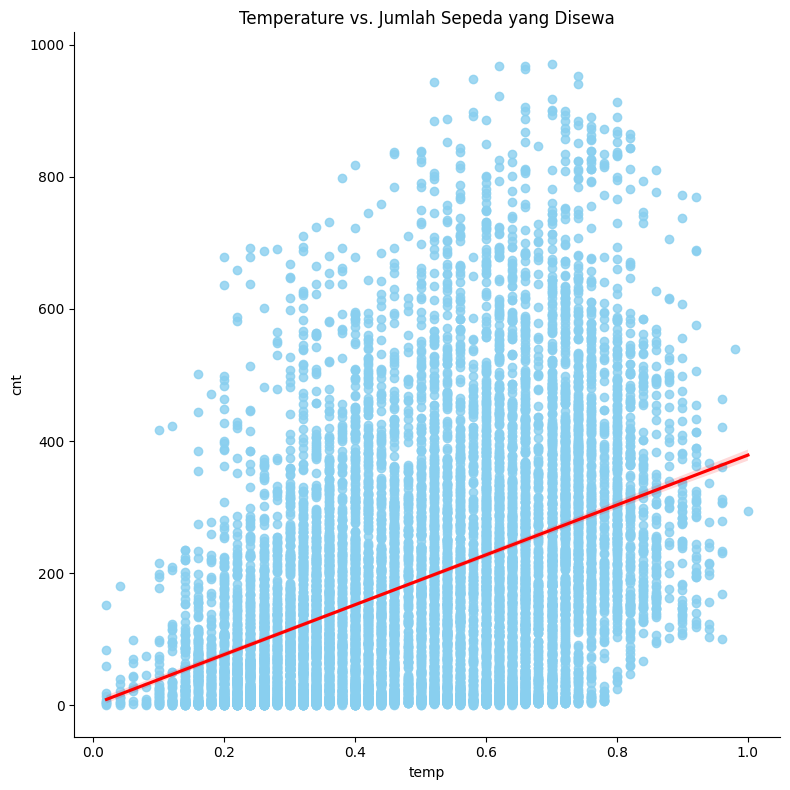

In [252]:
# Figure
fig, ax = plt.subplots(figsize=(8,8))

# Plot
sns.regplot(data=data, x='temp', y='cnt', ax=ax, color='#89CFEF', line_kws={"color": "red"})

# Label
ax.set(
    title='Temperature vs. Jumlah Sepeda yang Disewa',
    xlabel='temp',
    ylabel='cnt'
)

# Hapus garis tepi
despine(ax)

# Visualisasi
plt.tight_layout()
plt.show()

Insight:
- Semakin tinggi temperatur yang sudah dinormalisasi, semakin banyak jumlah sepeda yang disewa

##### c. Kolom `year` vs `cnt`

In [253]:
# Aggregasi
year = data[['year', 'cnt']].groupby('year').agg(['sum', 'median'])
year.columns = year.columns.droplevel(0)
year = year.sort_values('sum', ascending=False).reset_index()
year

,year,sum,median
0,2012,1424063,189.0
1,2011,878033,110.0


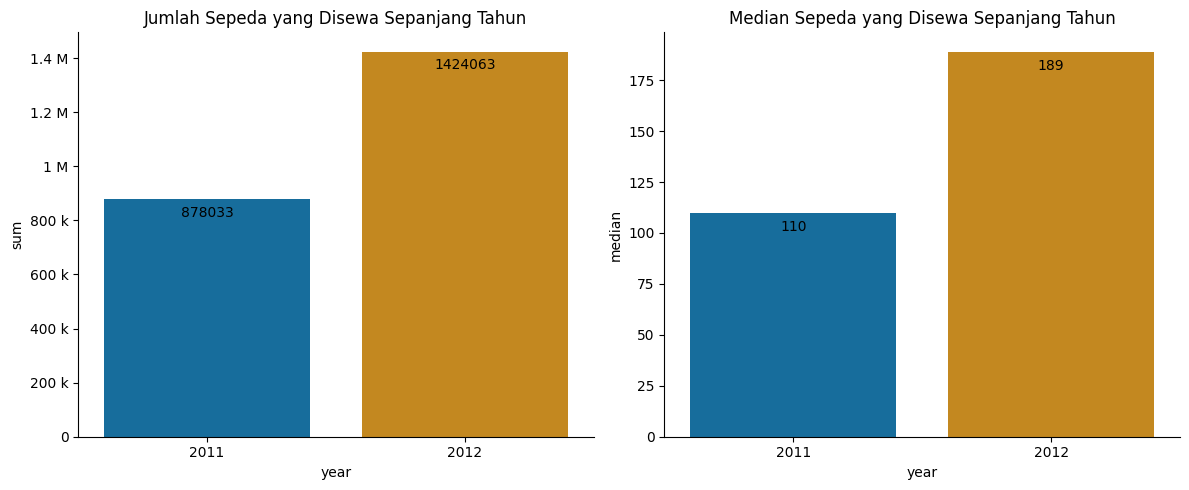

In [254]:
# Figure
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Plot SUM
sns.barplot(data=year, x='year', y='sum', palette='colorblind', ax=ax[0])

ax[0].set(
    title='Jumlah Sepeda yang Disewa Sepanjang Tahun',
    xlabel='year',
    ylabel='sum'
)
ax[0].yaxis.set_major_formatter(ticker.EngFormatter())
for bar in ax[0].patches:
    x, y = bar.get_xy()
    ax[0].text(
        x + bar.get_width()/2,
        y + bar.get_height() - 50000,
        f'{bar.get_height():.0f}',
        va='center', ha='center', color='black'
    )

# Plot MEDIAN
sns.barplot(data=year, x='year', y='median', palette='colorblind', ax=ax[1])

ax[1].set(
    title='Median Sepeda yang Disewa Sepanjang Tahun',
    xlabel='year',
    ylabel='median'
)
for bar in ax[1].patches:
    x, y = bar.get_xy()
    ax[1].text(
        x + bar.get_width()/2,
        y + bar.get_height() -7,
        f'{bar.get_height():.0f}',
        va='center', ha='center', color='black'
    )

# Hapus garis tepi
despine(ax[0])
despine(ax[1])

# Visualisasi
plt.tight_layout()
plt.show()

> Ada kenaikan jumlah dan median sepeda yagn disewa dari 2011 ke 2012

#### 2. Categorical Variables vs Target

> Agar mudah untuk dianalisis kolom `month`, `day` dan `hr` akan diperlakukan sebagai tipe kategorikal.

##### a. `month` vs `cnt`

In [255]:
# Aggregasi
month = data[['month', 'cnt']].groupby('month').agg(['sum', 'median'])
month.columns = month.columns.droplevel(0)
month = month.sort_values('month').reset_index()
month['Proporsi'] = (month['sum'])/(sum(month['sum']))*100
month.loc[0, 'month']='January'
month.loc[1, 'month']='February'
month.loc[2, 'month']='March'
month.loc[3, 'month']='April'
month.loc[4, 'month']='May'
month.loc[5, 'month']='June'
month.loc[6, 'month']='July'
month.loc[7, 'month']='August'
month.loc[8, 'month']='September'
month.loc[9, 'month']='October'
month.loc[10, 'month']='November'
month.loc[11, 'month']='December'
month

,month,sum,median,Proporsi
0,January,94851,66.0,4.120202
1,February,107202,82.0,4.656713
2,March,156458,106.0,6.796328
3,April,185646,142.0,8.064216
4,May,238064,193.0,10.341185
5,June,240638,201.0,10.452996
6,July,244597,202.0,10.624970
7,August,242685,198.0,10.541915
8,September,248844,194.0,10.809454
9,October,222337,175.0,9.658025


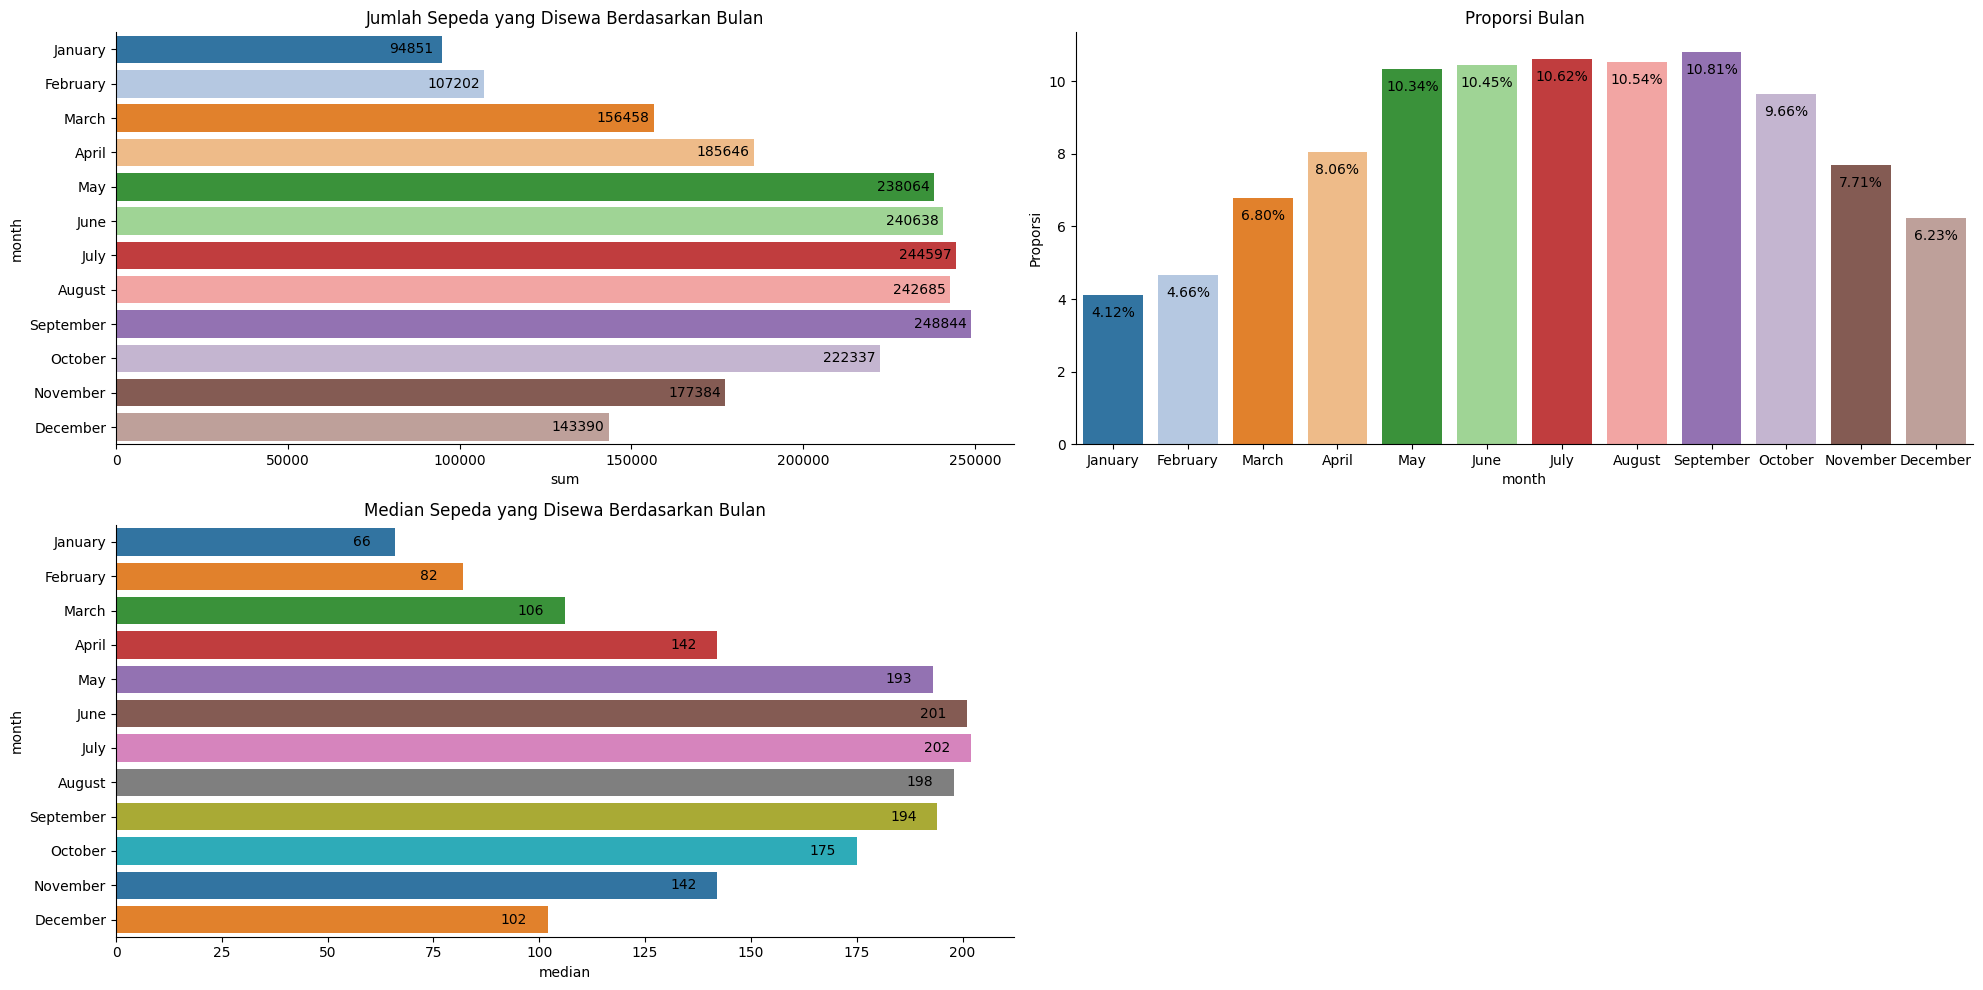

In [256]:
# Figure
fig, ax = plt.subplots(2,2, figsize=(20,10))

# Color map
colors = plt.get_cmap('tab20').colors
# -----------------------------------------------------------------
# Barplot SUM
sns.barplot(
    y=month['month'],
    x=month['sum'],
    palette='tab20',
    ax=ax[0][0]
)
ax[0][0].set(title='Jumlah Sepeda yang Disewa Berdasarkan Bulan')

for bar in ax[0][0].patches:
    x, y = bar.get_xy()
    ax[0][0].text(
        x + bar.get_width() - 9000,
        y + bar.get_height()/2,
        f'{bar.get_width():.0f}',
        va='center', ha='center', color='black'
    )
# -----------------------------------------------------------------
# Barplot MEDIAN
sns.barplot(
    y=month['month'],
    x=month['median'],
    palette='tab10',
    ax=ax[1][0])
ax[1][0].set(title='Median Sepeda yang Disewa Berdasarkan Bulan')

for bar in ax[1][0].patches:
    x, y = bar.get_xy()
    ax[1][0].text(
        x + bar.get_width()-8,
        y + bar.get_height()/2,
        f'{bar.get_width():.0f}',
        va='center', ha='center', color='black'
    )
# -----------------------------------------------------------------
# Barplot Proporsi
sns.barplot(
    x=month['month'],
    y=month['Proporsi'],
    palette='tab20',
    ax=ax[0][1]
)
ax[0][1].set_title('Proporsi Bulan')

for bar in ax[0][1].patches:
    x, y = bar.get_xy()
    ax[0][1].text(
        x + bar.get_width()/2,
        y + bar.get_height() - 0.5,
        f'{bar.get_height():.2f}%',
        va='center', ha='center', color='black'
    )
# -----------------------------------------------------------------

# Hapus garis tepi
despine(ax[0][0])
despine(ax[0][1])
despine(ax[1][0])

# Menghilangkan subplot figure[1,1]
fig.delaxes(ax[1, 1])

# Visualisasi
plt.tight_layout()
plt.show()

Insight:
- Bulan yang paling padat dimulai dari bulan Mei sampai ke Oktober

##### b. `day` vs `cnt`

In [257]:
# Aggregasi
day = data[['day', 'cnt']].groupby('day').agg(['sum', 'median'])
day.columns = day.columns.droplevel(0)
day = day.sort_values('day').reset_index()
day['Proporsi'] = (day['sum'])/(sum(day['sum']))*100
day.loc[0, 'day']='Monday'
day.loc[1, 'day']='Tuesday'
day.loc[2, 'day']='Wednesday'
day.loc[3, 'day']='Thursday'
day.loc[4, 'day']='Friday'
day.loc[5, 'day']='Saturday'
day.loc[6, 'day']='Sunday'
day

,day,sum,median,Proporsi
0,Monday,318350,144.0,13.828702
1,Tuesday,324335,145.5,14.088683
2,Wednesday,335914,144.0,14.591659
3,Thursday,340191,153.0,14.777446
4,Friday,336747,160.0,14.627843
5,Saturday,337143,132.0,14.645045
6,Sunday,309416,117.0,13.440621


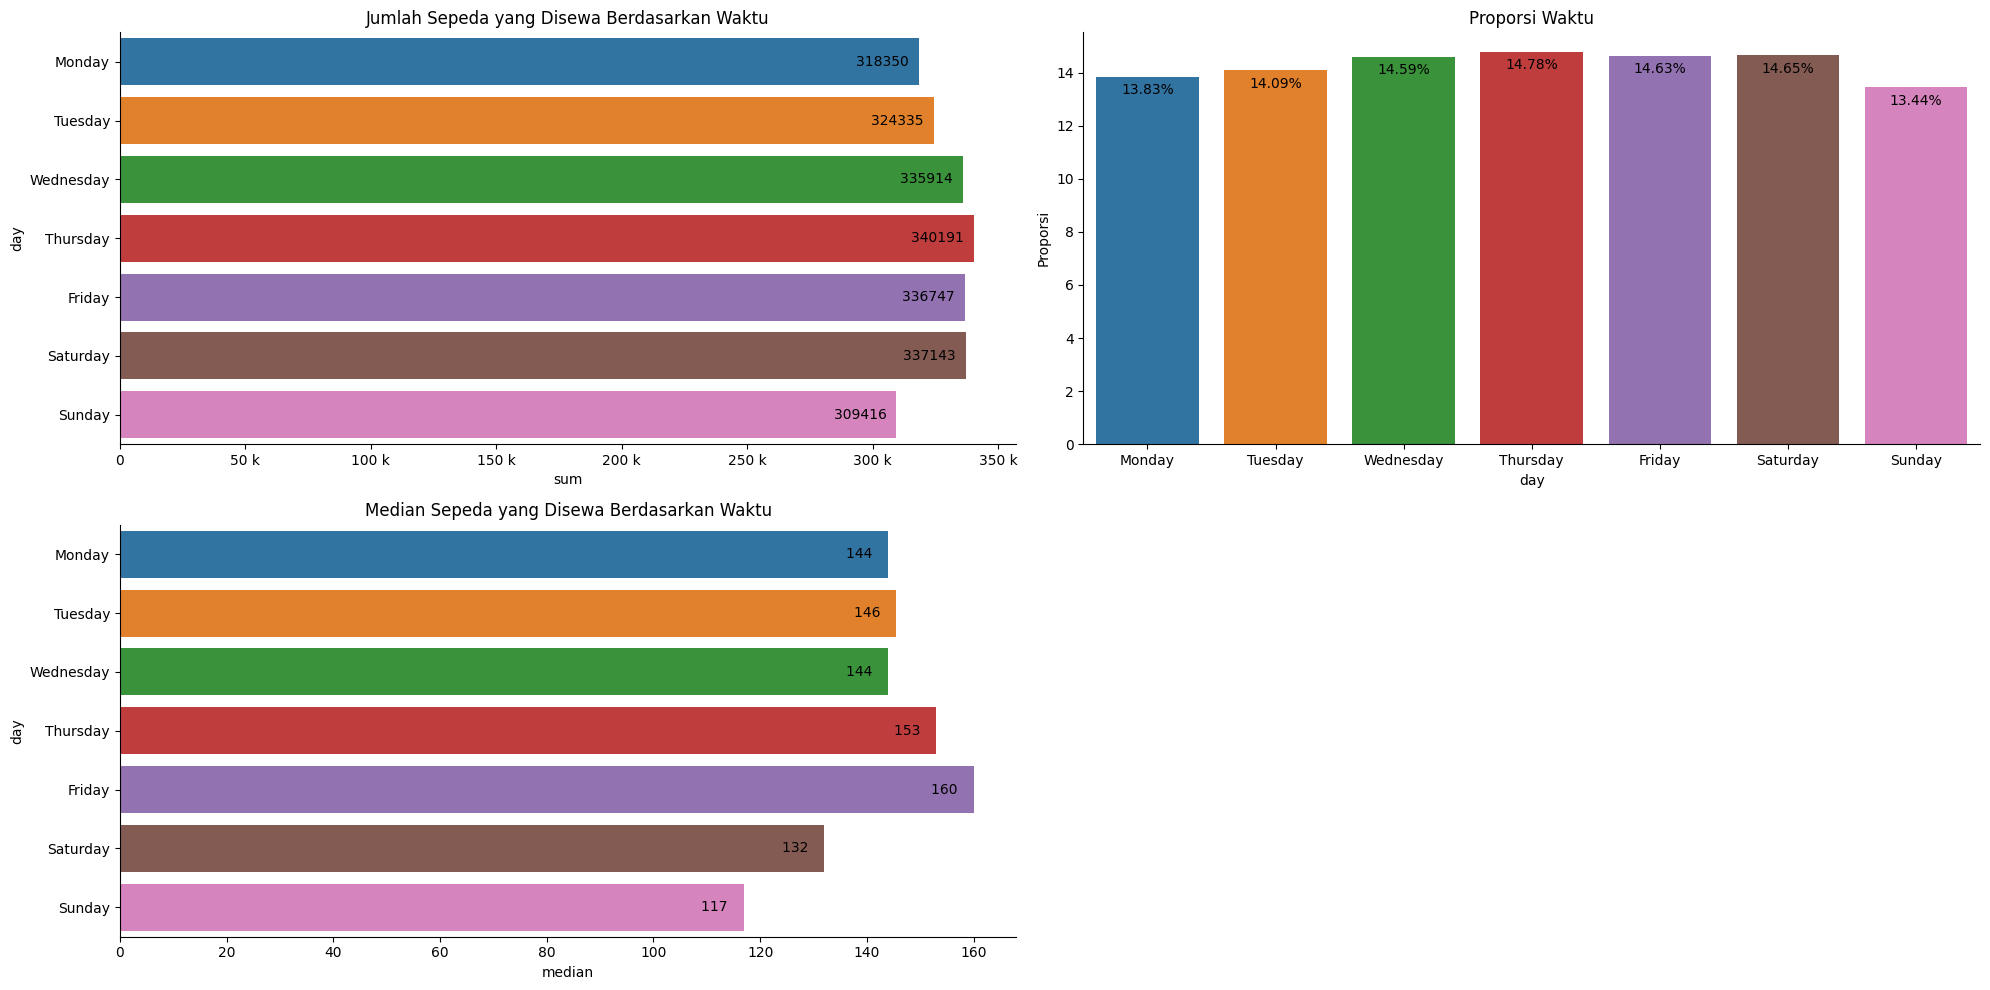

In [258]:
# Figure
fig, ax = plt.subplots(2,2, figsize=(20,10))

# Color map
colors = plt.get_cmap('tab10').colors
# -----------------------------------------------------------------
# Barplot SUM
sns.barplot(
    x=day['sum'],
    y=day['day'],
    palette='tab10',
    ax=ax[0][0]
)
ax[0][0].set(title='Jumlah Sepeda yang Disewa Berdasarkan Waktu')
ax[0][0].xaxis.set_major_formatter(ticker.EngFormatter())

for bar in ax[0][0].patches:
    x, y = bar.get_xy()
    ax[0][0].text(
        x + bar.get_width() - 25000,
        y + bar.get_height()/2,
        f'{bar.get_width():.0f} ',
        va='center', ha='left', color='black'
    )
# -----------------------------------------------------------------
# Barplot MEDIAN
sns.barplot(
    x=day['median'],
    y=day['day'],
    palette='tab10',
    ax=ax[1][0])
ax[1][0].set(title='Median Sepeda yang Disewa Berdasarkan Waktu')
ax[1][0].xaxis.set_major_formatter(ticker.EngFormatter())

for bar in ax[1][0].patches:
    x, y = bar.get_xy()
    ax[1][0].text(
        x + bar.get_width() - 8,
        y + bar.get_height()/2,
        f'{bar.get_width():.0f} ',
        va='center', ha='left', color='black'
    )
# -----------------------------------------------------------------
# Barplot Proporsi
sns.barplot(
    x=day['day'],
    y=day['Proporsi'],
    palette='tab10',
    ax=ax[0][1]
)
ax[0][1].set_title('Proporsi Waktu')

for bar in ax[0][1].patches:
    x, y = bar.get_xy()
    ax[0][1].text(
        x + bar.get_width()/2,
        y + bar.get_height() - 0.5,
        f'{bar.get_height():.2f}%',
        va='center', ha='center', color='black'
    )
# -----------------------------------------------------------------

# Hapus garis tepi
despine(ax[0][0])
despine(ax[0][1])
despine(ax[1][0])

# Menghilangkan subplot figure[1,1]
fig.delaxes(ax[1, 1])

# Visualisasi
plt.tight_layout()
plt.show()

##### c. `hr` vs `cnt`

In [259]:
# Aggregasi
hour = data[['hr', 'cnt']].groupby('hr').agg(['sum', 'median'])
hour.columns = hour.columns.droplevel(0)
hour = hour.sort_values('hr').reset_index()
hour['Proporsi'] = (hour['sum'])/(sum(hour['sum']))*100
hour

,hr,sum,median,Proporsi
0,0,28080,40.0,1.219758
1,1,16365,18.0,0.710874
2,2,11237,11.0,0.488120
3,3,5479,6.0,0.238001
4,4,3052,6.0,0.132575
5,5,10593,19.0,0.460146
6,6,38806,79.0,1.685681
7,7,105639,206.0,4.588818
8,8,188532,400.0,8.189580
9,9,108262,216.0,4.702758


Insight:
- Median hari Weekend (Sabtu & Minggu) lebih rendah dari hari yang lain. Terdapat indikasi bahwa sebagian _customer_ menyewa sepeda untuk pergi bekerja di hari kerja.

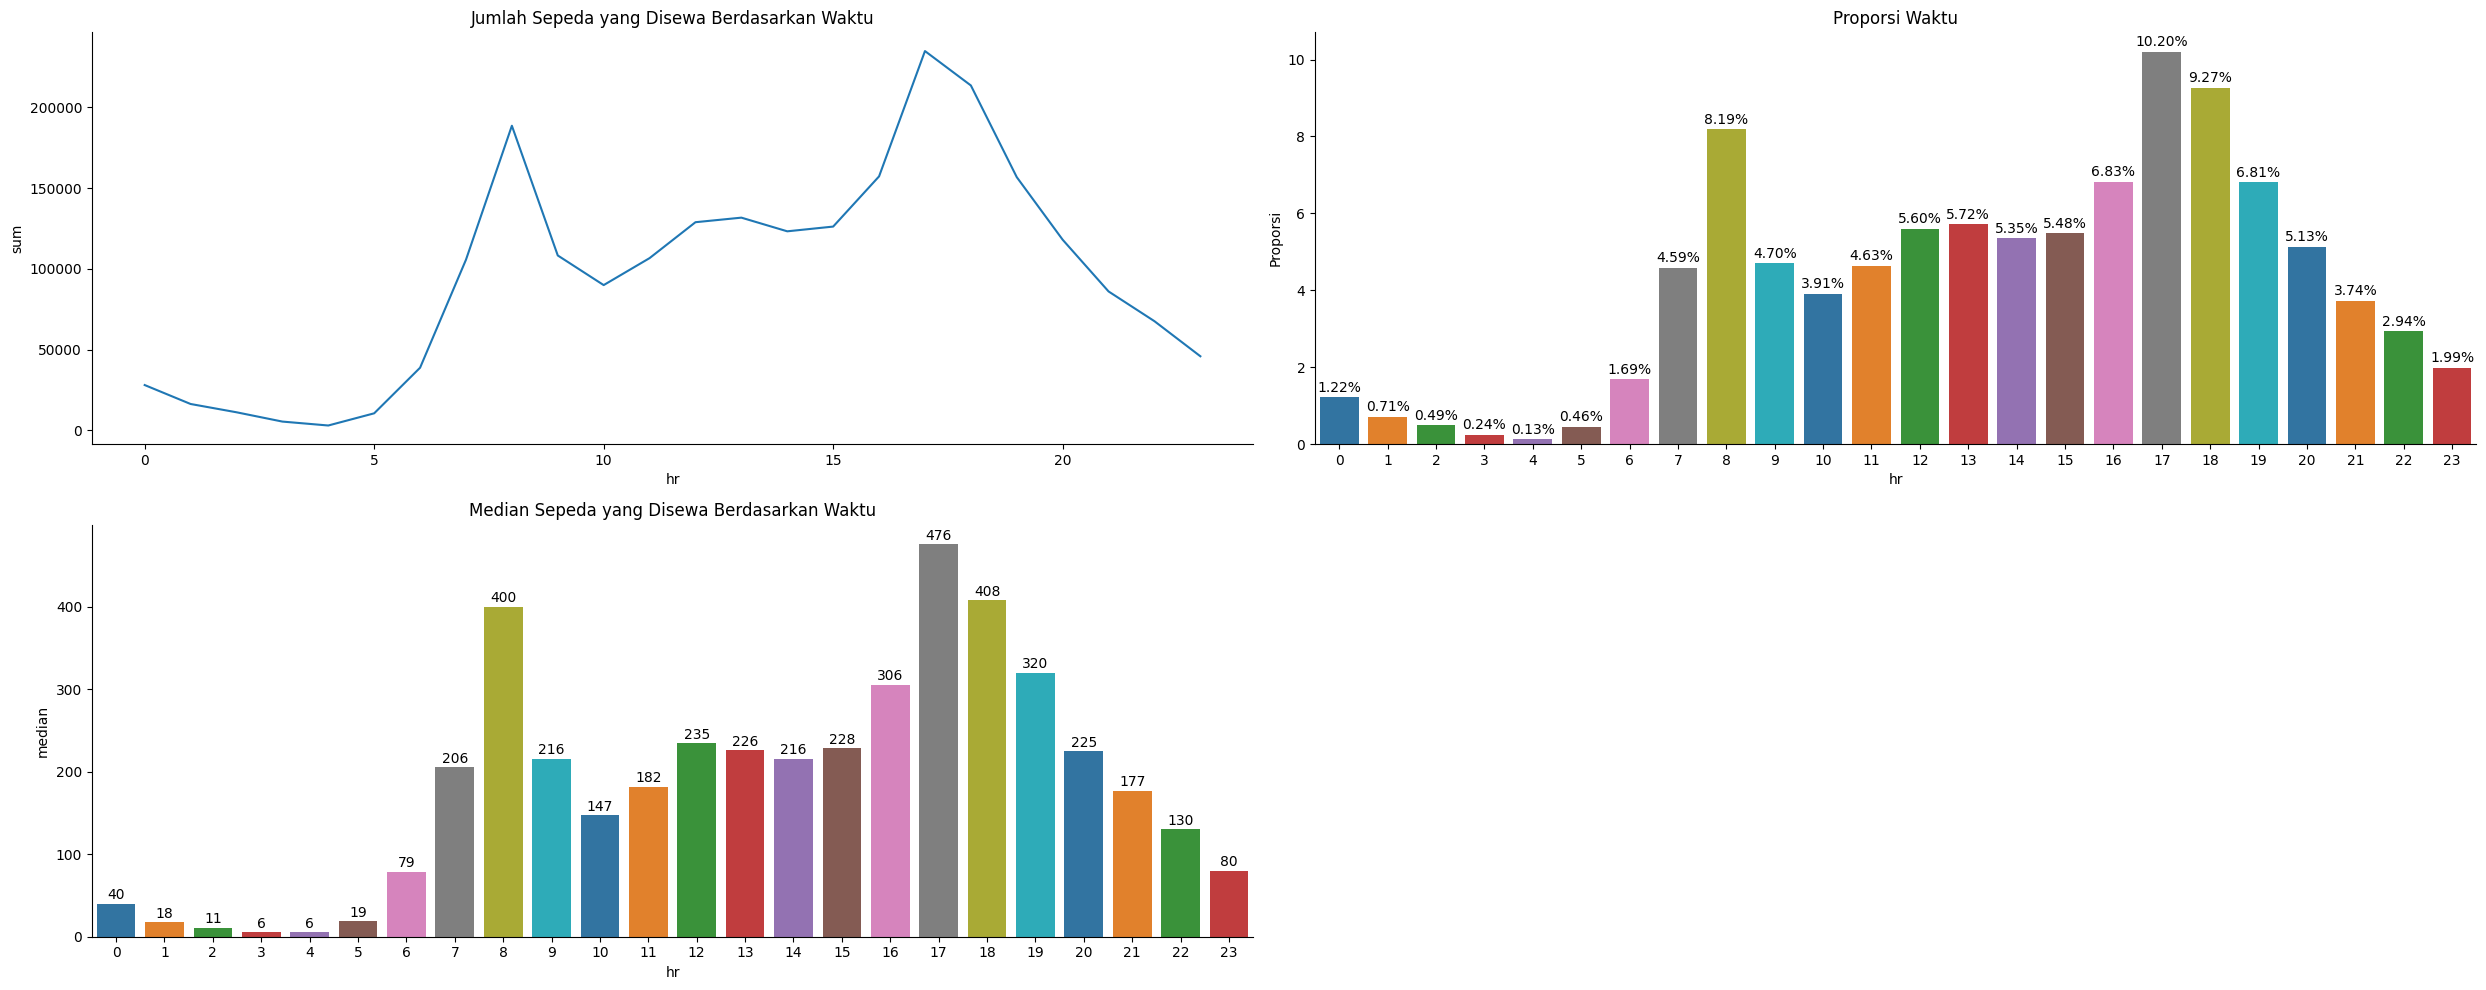

In [260]:
# Figure
fig, ax = plt.subplots(2,2, figsize=(25,10))

# Color map
colors = plt.get_cmap('tab10').colors
# -----------------------------------------------------------------
# Barplot SUM
sns.lineplot(
    y=hour['sum'],
    x=hour['hr'],
    ax=ax[0][0]
)
ax[0][0].set(title='Jumlah Sepeda yang Disewa Berdasarkan Waktu')
ax[0][0].xaxis.set_major_formatter(ticker.EngFormatter())
# -----------------------------------------------------------------
# Barplot MEDIAN
sns.barplot(
    y=hour['median'],
    x=hour['hr'],
    palette='tab10',
    ax=ax[1][0])
ax[1][0].set(title='Median Sepeda yang Disewa Berdasarkan Waktu')
ax[1][0].xaxis.set_major_formatter(ticker.EngFormatter())

for bar in ax[1][0].patches:
    x, y = bar.get_xy()
    ax[1][0].text(
        x + bar.get_width()/2,
        y + bar.get_height() + 10,
        f'{bar.get_height():.0f}',
        va='center', ha='center', color='black'
    )
# -----------------------------------------------------------------
# Barplot Proporsi
sns.barplot(
    x=hour['hr'],
    y=hour['Proporsi'],
    palette='tab10',
    ax=ax[0][1]
)
ax[0][1].set_title('Proporsi Waktu')

for bar in ax[0][1].patches:
    x, y = bar.get_xy()
    ax[0][1].text(
        x + bar.get_width()/2,
        y + bar.get_height() + 0.25,
        f'{bar.get_height():.2f}%',
        va='center', ha='center', color='black'
    )
# -----------------------------------------------------------------

# Hapus garis tepi
despine(ax[0][0])
despine(ax[0][1])
despine(ax[1][0])

# Menghilangkan subplot figure[1,1]
fig.delaxes(ax[1, 1])

# Visualisasi
plt.tight_layout()
plt.show()

| No | Time | `Hour` |
| --- | --- | --- |
| 1 | Early Night | 21.00 - 00.00 |
| 2 | Late Night | 00.00 - 03.00 |
| 3 | Dawn | 03.00 - 06.00 |
| 4 | Early Morning | 06.00 - 09.00 |
| 5 | Late Morning | 09.00 - 12.00 |
| 6 | Early Afternoon | 12.00 - 15.00 |
| 7 | Late Afternoon | 15.00 - 18.00 |
| 8 | Dusk | 18.00 - 21.00 |

Insight:
- Customer paling banyak menyewa pada pukul 08:00 pagi, 17:00 sore, dan 18:00 sore, terlihat dari jumlah dan median yang paling tinggi. Artinya pusat aktivitas paling padat ada pada waktu tersebut (Indikasi jam pergi/pulang kerja).
- Walaupun nilai median pada waktu **jam istirahat/tidur** (00:00 - 06:00) paling rendah, masih ada _customer_ yang menyewa sepeda.

##### d. `holiday` vs `cnt`

In [261]:
# Aggregasi
holiday = data[['holiday', 'cnt']].groupby('holiday').agg(['sum', 'median'])
holiday.columns = holiday.columns.droplevel(0)
holiday = holiday.sort_values('sum', ascending=False).reset_index()
holiday

,holiday,sum,median
0,No,2244911,144.0
1,Yes,57185,97.5


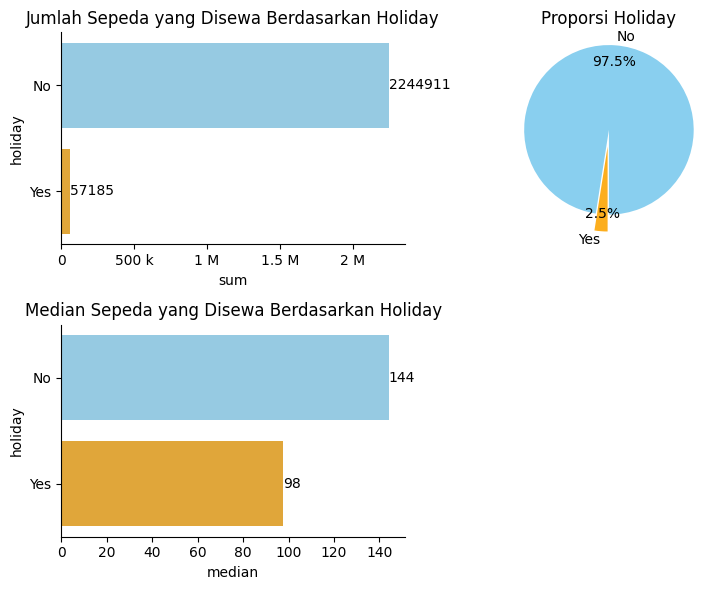

In [262]:
# Figure
fig, ax = plt.subplots(2,2, figsize=(8, 6))

# Barplot SUM
sns.barplot(
    x=holiday['sum'], 
    y=holiday['holiday'], 
    palette=['#89CFEF', '#FCAE1E'], 
    ax=ax[0][0])
ax[0][0].set(title='Jumlah Sepeda yang Disewa Berdasarkan Holiday')
ax[0][0].xaxis.set_major_formatter(ticker.EngFormatter())

for bar in ax[0][0].patches:
    x, y = bar.get_xy()
    ax[0][0].text(
        x + bar.get_width(), 
        y + bar.get_height()/2, 
        f'{bar.get_width():.0f} ',
        va='center', ha='left', color='black'
    )
#-------------------------------------------------------------------
# Barplot MEDIAN
sns.barplot(
    x=holiday['median'], 
    y=holiday['holiday'], 
    palette=['#89CFEF', '#FCAE1E'], 
    ax=ax[1][0])
ax[1][0].set(title='Median Sepeda yang Disewa Berdasarkan Holiday')
ax[1][1].xaxis.set_major_formatter(ticker.EngFormatter())

for bar in ax[1][0].patches:
    x, y = bar.get_xy()
    ax[1][0].text(
        x + bar.get_width(), 
        y + bar.get_height()/2, 
        f'{bar.get_width():.0f}',
        va='center', ha='left', color='black'
    )
#-------------------------------------------------------------------
# Piechart
ax[0][1].pie(
    holiday['sum'],
    labels = holiday['holiday'].unique(),
    autopct='%1.1f%%',
    colors = ['#89CFEF', '#FCAE1E'],
    startangle =270,
    pctdistance=0.8,
    explode=[0.1, 0.1]
)
ax[0][1].set_title('Proporsi Holiday')
#-------------------------------------------------------------------
# Hapus garis tepi
despine(ax[0][0])
despine(ax[1][0])

# Menghilangkan subplot figure[1,1]
fig.delaxes(ax[1, 1])

# Visualisasi
plt.tight_layout()
plt.show()

Insight:
- Jumlah dan median _customer_ yang menyewa sepeda lebih tinggi ketika hari kerja (holiday: No)
- _Customer_ cenderung menyewa sepeda ketika sedang tidak libur (sewa ketika hari kerja). Terdapat indikasi bahwa _customer_ menyewa sepeda untuk pergi bekerja.
- Ada pengaruh jam hari libur terhadap jumlah sepeda yang disewa.

##### e. `weathersit` vs `cnt`

In [263]:
# Aggregasi
weather = data[['weathersit', 'cnt']].groupby('weathersit').agg(['sum', 'median'])
weather.columns = weather.columns.droplevel(0)
weather = weather.sort_values('sum', ascending=False).reset_index()
weather

,weathersit,sum,median
0,Normal,1655713,160.0
1,Ringan,532674,128.0
2,Buruk,113486,69.0
3,Sangat Buruk,223,36.0


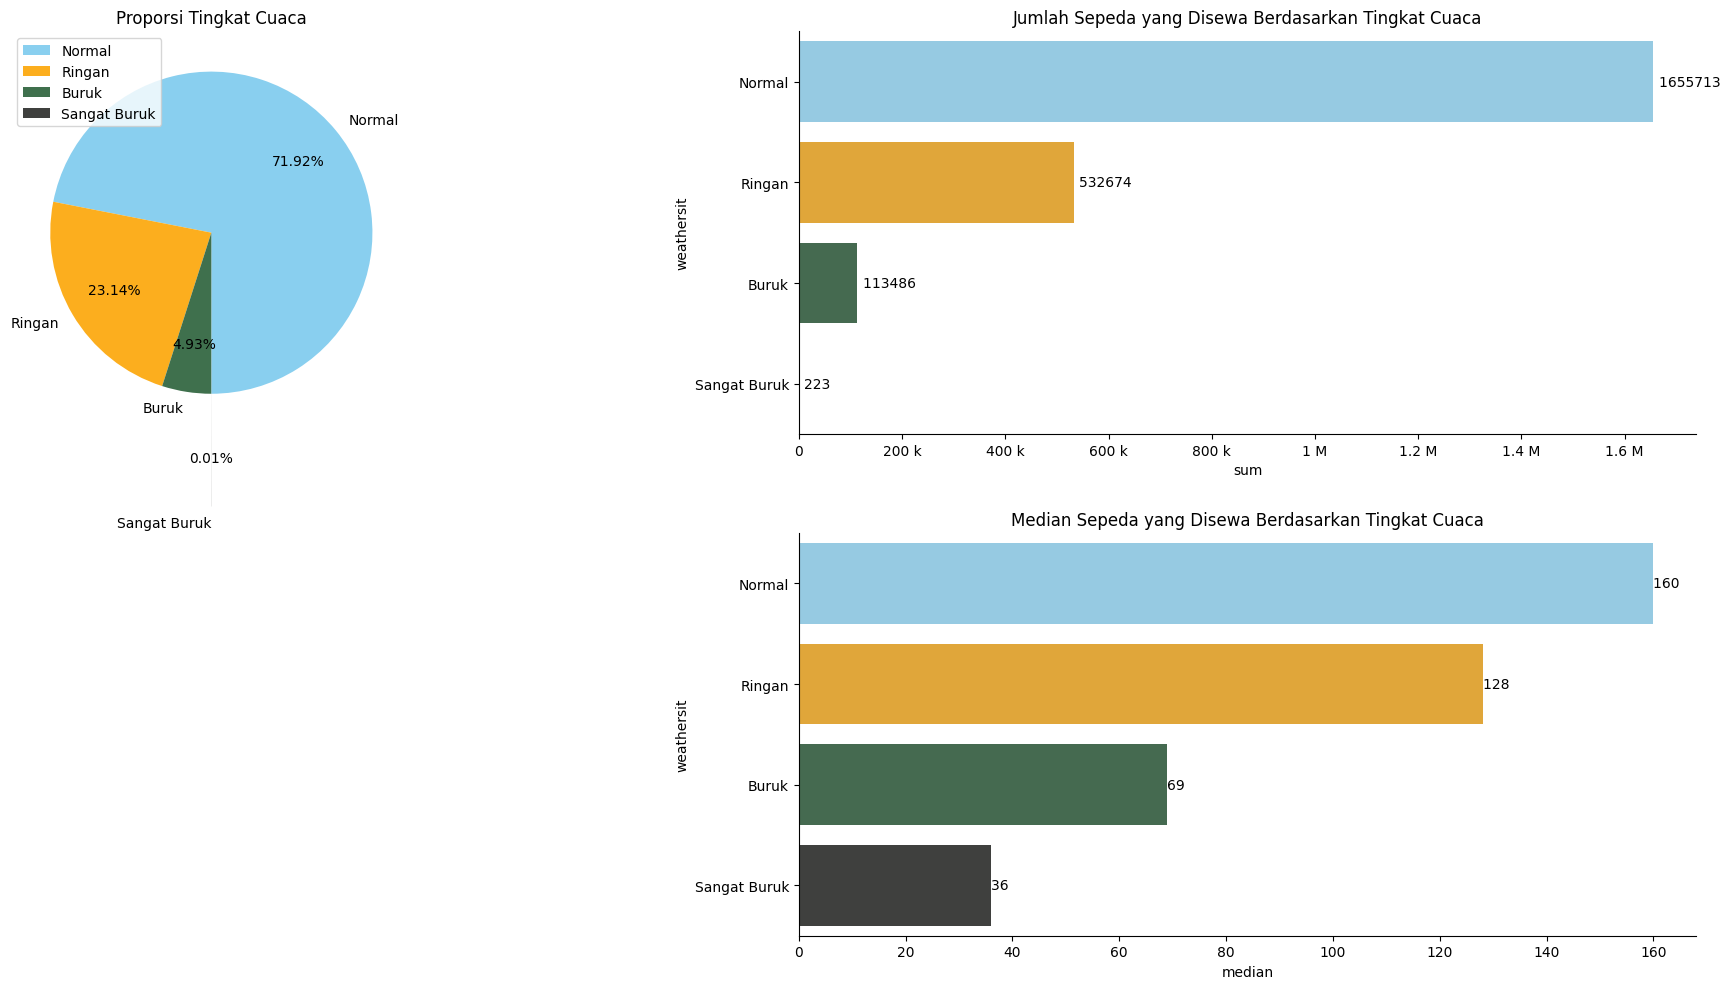

In [264]:
# Figure
fig, ax = plt.subplots(2,2, figsize=(20,10))

# Piechart
ax[0][0].pie(
    weather['sum'],
    labels = weather['weathersit'].unique(),
    autopct='%1.2f%%',
    colors = ['#89CFEF', '#FCAE1E', '#3F704D', '#3F403E'],
    startangle=270,
    pctdistance=0.7,
    explode=[0, 0, 0, 0.7]
)
ax[0][0].set_title('Proporsi Tingkat Cuaca')
ax[0][0].legend(loc='best')

# Barplot SUM
sns.barplot(
    x=weather['sum'],
    y=weather['weathersit'],
    palette=['#89CFEF', '#FCAE1E', '#3F704D', '#3F403E'],
    ax=ax[0][1]
)
ax[0][1].set(title='Jumlah Sepeda yang Disewa Berdasarkan Tingkat Cuaca')
ax[0][1].xaxis.set_major_formatter(ticker.EngFormatter())

for bar in ax[0][1].patches:
    x, y = bar.get_xy()
    ax[0][1].text(
        x + bar.get_width() + 10000,
        y + bar.get_height()/2,
        f'{bar.get_width():.0f} ',
        va='center', ha='left', color='black'
    )


# Barplot MEDIAN
sns.barplot(
    x=weather['median'],
    y=weather['weathersit'],
    palette=['#89CFEF', '#FCAE1E', '#3F704D', '#3F403E'],
    ax=ax[1][1])
ax[1][1].set(title='Median Sepeda yang Disewa Berdasarkan Tingkat Cuaca')
ax[1][1].xaxis.set_major_formatter(ticker.EngFormatter())

for bar in ax[1][1].patches:
    x, y = bar.get_xy()
    ax[1][1].text(
        x + bar.get_width(),
        y + bar.get_height()/2,
        f'{bar.get_width():.0f} ',
        va='center', ha='left', color='black'
    )

# Haous garis tepi
despine(ax[0][1])
despine(ax[1][1])

# Menghilangkan subplot figure[1,1]
fig.delaxes(ax[1, 0])

# Visualisasi
plt.tight_layout()
plt.show()

Insight:
- Jumlah dan median _customer_ yang menyewa sepeda berbeda di setiap tingkat cuaca.
- _Customer_ cenderung menyewa sepeda ketika cuaca sedang normal, dan jumlahnya menurun seiring tingkat cuaca yang semakin buruk.
- Hal di atas mengindikasikan bahwa jumlah orang yang menyewa sepeda dipengaruhi oleh tingkat cuaca.

##### f. `season` vs `cnt`

In [265]:
# Aggregasi
season = data[['season', 'cnt']].groupby('season').agg(['sum', 'median'])
season.columns = season.columns.droplevel(0)
season = season.sort_values('sum', ascending=False).reset_index()
season

,season,sum,median
0,Summer,742488,198.0
1,Spring,639704,165.5
2,Fall,585451,155.0
3,Winter,334453,76.0


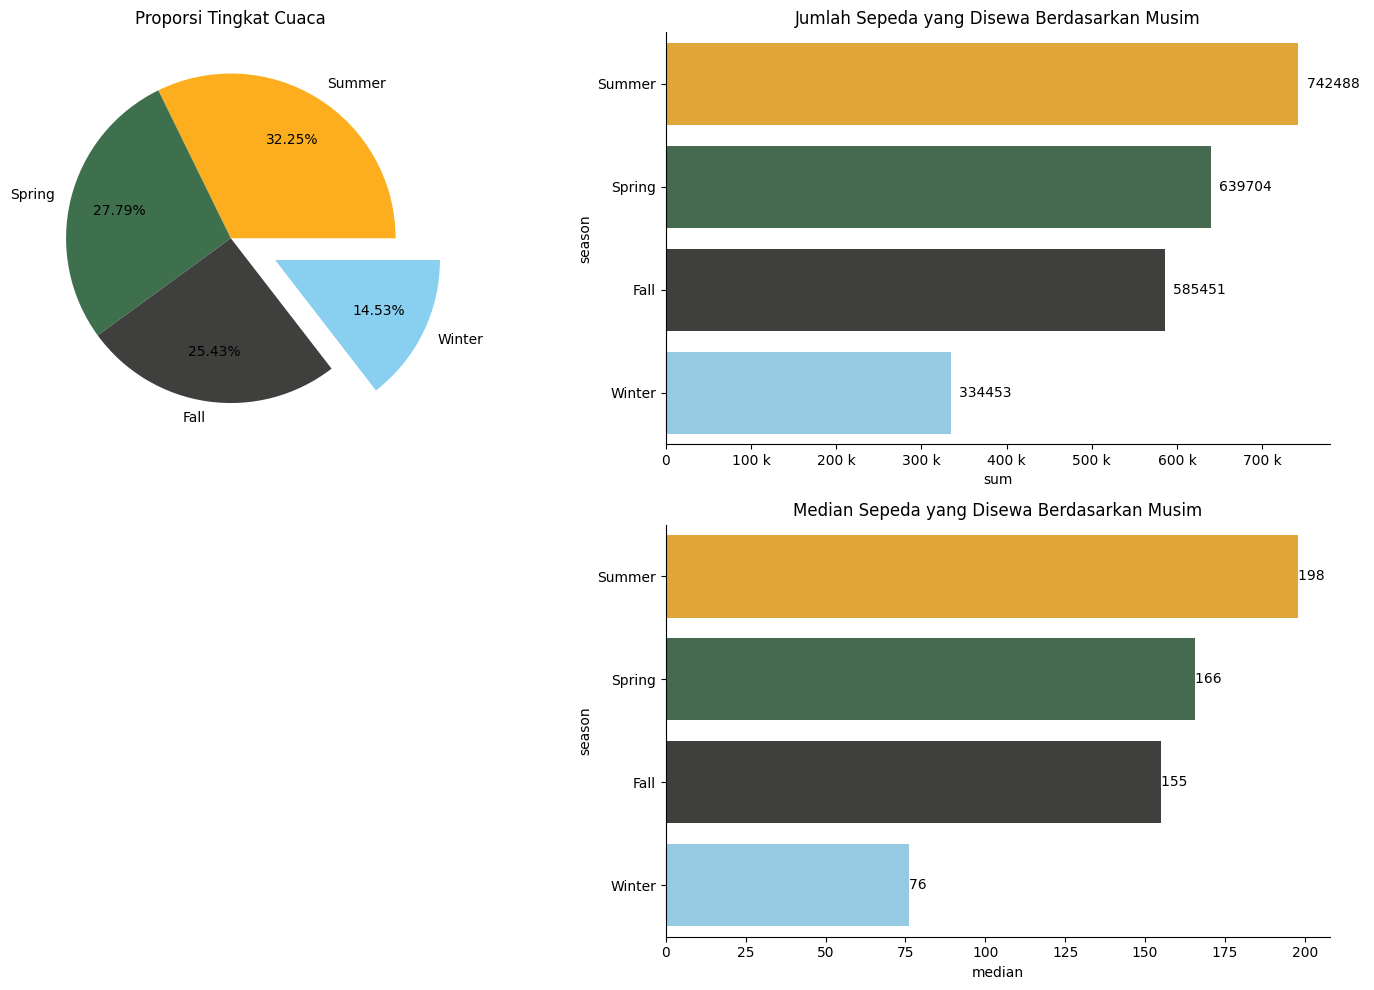

In [266]:
# Figure
fig, ax = plt.subplots(2,2, figsize=(15,10))

# Piechart
ax[0][0].pie(
    season['sum'],
    labels = season['season'].unique(),
    autopct='%1.2f%%',
    colors = ['#FCAE1E', '#3F704D', '#3F403E', '#89CFEF'],
    startangle=0,
    pctdistance=0.7,
    explode=[0, 0, 0, 0.3]
)
ax[0][0].set_title('Proporsi Tingkat Cuaca')

# Barplot SUM
sns.barplot(
    x=season['sum'],
    y=season['season'],
    palette=['#FCAE1E', '#3F704D', '#3F403E', '#89CFEF'],
    ax=ax[0][1])
ax[0][1].set(title='Jumlah Sepeda yang Disewa Berdasarkan Musim')
ax[0][1].xaxis.set_major_formatter(ticker.EngFormatter())

for bar in ax[0][1].patches:
    x, y = bar.get_xy()
    ax[0][1].text(
        x + bar.get_width() +10000,
        y + bar.get_height()/2,
        f'{bar.get_width():.0f} ',
        va='center', ha='left', color='black'
    )

# Barplot MEDIAN
sns.barplot(
    x=season['median'],
    y=season['season'],
    palette=['#FCAE1E', '#3F704D', '#3F403E', '#89CFEF'],
    ax=ax[1][1])
ax[1][1].set(title='Median Sepeda yang Disewa Berdasarkan Musim')
ax[1][1].xaxis.set_major_formatter(ticker.EngFormatter())

for bar in ax[1][1].patches:
    x, y = bar.get_xy()
    ax[1][1].text(
        x + bar.get_width(),
        y + bar.get_height()/2,
        f'{bar.get_width():.0f} ',
        va='center', ha='left', color='black'
    )

# Hapus garis tepi
despine(ax[0][1])
despine(ax[1][1])

# Menghilangkan subplot figure[1,1]
fig.delaxes(ax[1, 0])

# Visualisasi
plt.tight_layout()
plt.show()

Insight:
- Jumlah dan median _customer_ yang menyewa sepeda berbeda di setiap musim
- _Customer_ paling banyak menyewa sepeda ketika musim panas, dan cenderung menghindari menyewa sepeda ketika musim dingin.
- Terlihat ada sedikit pengaruh musim terhadap jumlah sepeda yang disewa.

---

# Modelling

#### 1. Data Preparation

##### a. `Feature Engineering`

**Encoding**

| No | Kolom | Variable Type | VIF/Cardinality | Range | Encoding |
| --- | --- | --- | --- | --- | --- |
| 1 | `year` | Numerical | 28.8180 | 2011 - 2012 | - |
| 2 | `month` | Numerical | 4.947975 | 1 - 12 | - |
| 3 | `day` | Numerical | 2.930588 | 1 - 31 | - |
| 4 | `hr` | Numerical | 3.892729 | 0 - 23 | - |
| 5 | `holiday` | Categorical | 2 | 0 / 1 | OneHot Encoding |
| 6 | `hum` | Numerical | 7.003487 | 0 - 1 | - |
| 7 | `weathersit` | Categorical | 4 | Normal - Sangat Buruk | OneHot Encoding |
| 8 | `season` | Categorical | 4 | Winter - Fall | OneHotEncoding |
| 9 | `temp` | Numerical | 8.101644 | 0.02 - 1.0 | - |

#### 2. Define Features and Target

In [267]:
data.head(2)

,dteday,year,month,day,hr,holiday,hum,weathersit,season,temp,atemp,casual,registered,cnt
0,2011-01-01,2011,1,5,0,No,0.81,Normal,Winter,0.24,0.2879,3,13,16
1,2011-01-01,2011,1,5,1,No,0.80,Normal,Winter,0.22,0.2727,8,32,40


In [268]:
# Define Features & Target
# Features
X = data[['year', 'month', 'day', 'hr', 'holiday', 'hum', 'weathersit', 'season', 'temp']]

# target
y = data['cnt']

#### 3. Data Splitting

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 4. Model Benchmarking

##### a. `Transformer`

In [270]:
# Membagi kolom berisi data kategorikal & numerikal
kolom_kategori = ['holiday', 'weathersit', 'season']
kolom_numerik = ['year', 'month', 'day', 'hr', 'hum', 'temp']

# Column Transformer
transformer = ColumnTransformer([
    ('Onehot', OneHotEncoder(drop='first'), kolom_kategori),
    ('Transformation', PowerTransformer(method='yeo-johnson'), kolom_numerik)
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Onehot', OneHotEncoder(drop='first'),
                                 ['holiday', 'weathersit', 'season']),
                                ('Transformation', PowerTransformer(),
                                 ['year', 'month', 'day', 'hr', 'hum',
                                  'temp'])])

PowerTransformer dengan metode yeo-johnson digunakan untuk transformasi data, agar membuat distribusi data lebih mendekati distribusi normal (Gaussian).

##### b. `Model Selection`

**Define the Models**

In [271]:
# Logistic Regression 
lr = LinearRegression()

# KNN Regressor
knn = KNeighborsRegressor()

# DecisionTree Regressor
dt = DecisionTreeRegressor(random_state=0)

# Lasso
lasso = Lasso(alpha=1)

# Ridge
ridge = Ridge(alpha=1)

# RandomForest Regressor
rf = RandomForestRegressor(random_state=0)

# Adaboost Regressor
ab = AdaBoostRegressor(random_state=0)

# GradientBoost Regressor
gb = GradientBoostingRegressor(random_state=0)

# ExtremeGradientBoost Regressor
xgb = XGBRegressor(random_state=0, verbosity=0)

# SupportVector Regressor
svr = SVR(kernel='rbf')

# LightGradientBoostingMachine Regressor
lgbm = lgb.LGBMRegressor(verbose=-1)

#----------------------------------------------------------------

# Polynomial
poly = PolynomialFeatures(degree=2)

In [272]:
models = [lr, knn, dt, lasso, ridge, rf, ab, gb, xgb, svr, lgbm]

In [273]:
def get_model_name(model):
    if hasattr(model, 'regressor'):
        return model.regressor.__class__.__name__
    else:
        return model.__class__.__name__

In [274]:
# Define the scoring metrics
scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error'
}

# Lists to store the scores
model_name = []
score_rmse = []
score_mae = []
score_mape = []

# Define the preprocessing step (assuming 'transformer' is defined elsewhere)

# Finding the best algorithm based on MAE, MAPE, R2
for model in models:
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=8)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    model_cv = cross_validate(
        estimator, 
        X_train, 
        y_train, 
        cv=kfold, 
        scoring=scoring, 
        error_score='raise'
    )

    model_name.append(get_model_name(model))
    score_rmse.append(model_cv['test_RMSE'].mean())
    score_mae.append(model_cv['test_MAE'].mean())
    score_mape.append(model_cv['test_MAPE'].mean())

# Creating a DataFrame for the results
results = pd.DataFrame({
    'Model': model_name,
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape
})

results.sort_values('MAPE', ascending=False)

,Model,RMSE,MAE,MAPE
5,RandomForestRegressor,-46.484384,-28.059759,-0.342229
2,DecisionTreeRegressor,-62.769107,-37.230676,-0.401980
8,XGBRegressor,-42.598340,-26.738836,-0.419196
10,LGBMRegressor,-43.150538,-27.142799,-0.428099
7,GradientBoostingRegressor,-68.165325,-45.899467,-0.859527
1,KNeighborsRegressor,-103.110594,-67.473786,-1.321584
9,SVR,-140.289934,-89.926508,-1.813904
6,AdaBoostRegressor,-110.608099,-89.819004,-2.826763
4,Ridge,-138.871756,-103.867062,-3.233779
0,LinearRegression,-138.871525,-103.869242,-3.234055


> RMSE paling rendah ada pada model XGBoostRegressor

> MAE paling rendah ada pada model XGBoostRegressor

> MAPE paling rendah ada pada model RandomForestRegressor

> Karena nilai MAPE yang dirasa masih cukup tinggi, di atas 0.3, artinya masih terdapat error sebesar 30% maka digunakan skala logaritmik untuk mengatasi skewness yang tinggi pada target menggunakan Transformed Target Regressor

In [275]:
# Model untuk Target skala logaritmik-eksponensial
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_ab = TransformedTargetRegressor(ab, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_svr = TransformedTargetRegressor(svr, func=np.log, inverse_func=np.exp)
log_lgbm = TransformedTargetRegressor(lgbm, func=np.log, inverse_func=np.exp)

In [276]:
models_log = [log_lr, log_knn, log_dt, log_lasso, log_ridge, log_rf, log_ab, log_gb, log_xgb, log_svr, log_lgbm]

Karena distribusi target (`cnt`) tidak berdistribusi normal dan terlihat [right-skewed](#a.-data-distribution), maka digunakan Transformed Target Regressor dengan fungsi logaritmik untuk mengatasinya. Hal ini dilakukan karena target memiliki jumlah [outlier](#6.-handling-outliers) yang banyak. TransformedTargetRegressor dengan fungsi logaritmik akan mengubah target dalam skala logaritmik dan dikembalikan ke awal dengan parameter inverse_func berupa eksponensial.

In [277]:
# Define the scoring metrics
scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error'
}

# Lists to store the scores
model_name = []
score_rmse = []
score_mae = []
score_mape = []

# Define the preprocessing step (assuming 'transformer' is defined elsewhere)

# Finding the best algorithm based on MAE, MAPE, R2
for model in models_log:
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=8)

    model_pipe = Pipeline([
        ('preprocessing', transformer),
        ('model', model),
    ])
    
    model_cv = cross_validate(
        model_pipe, 
        X_train, 
        y_train, 
        cv=kfold, 
        scoring=scoring, 
        error_score='raise'
    )

    model_name.append(get_model_name(model))
    score_rmse.append(model_cv['test_RMSE'].mean())
    score_mae.append(model_cv['test_MAE'].mean())
    score_mape.append(model_cv['test_MAPE'].mean())

# Creating a DataFrame for the results
results = pd.DataFrame({
    'Model': model_name,
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape
})

results.sort_values('MAPE', ascending=False)

,Model,RMSE,MAE,MAPE
8,XGBRegressor,-42.920857,-25.918655,-0.247485
10,LGBMRegressor,-44.428115,-27.068146,-0.252775
5,RandomForestRegressor,-46.982052,-28.208065,-0.282403
7,GradientBoostingRegressor,-77.731305,-47.788127,-0.386402
2,DecisionTreeRegressor,-63.191446,-37.134169,-0.397028
6,AdaBoostRegressor,-145.060304,-86.591288,-0.516663
1,KNeighborsRegressor,-106.190144,-64.293120,-0.721567
9,SVR,-114.641821,-66.422506,-0.785346
0,LinearRegression,-156.960359,-103.251839,-1.329559
4,Ridge,-156.953945,-103.247747,-1.329706


Dari hasil di atas didapat bahwa model yang paling baik, error paling rendah, adalah model ExtremeGradientBoosting dengan diikuti oleh LightGradientBoostingMachine dan RandomForestRegressor. Jika dilihat dari score MAPE-nya, ketiga model nilai errornya tersebut sudah dibawah 30%, sehingga akan dilakukan hyperparameter tuning pada ketiga modelt ersebut untuk mendapatkan model terbaik untuk dataset _bike sharing_.

---

**Predict Benchmark Model to Test Set**

In [278]:
# Melakukan benchmark model terbaik
models = {
    'XGBoostRegressor': log_xgb,
    'LGBMRegressor': log_lgbm,
    'RandomForestRegressor': log_rf
}

score_rmse = []
score_mae = []
score_mape = []

# Melakukan prediksi pada test set
for i in models:

    model_pipe = Pipeline([
        ('transformer', transformer),
        ('model', models[i])
    ])

    model_pipe.fit(X_train, y_train)
    y_pred = model_pipe.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning.sort_values('MAPE')

,RMSE,MAE,MAPE
XGBoostRegressor,47.078473,28.352423,0.256931
LGBMRegressor,47.071176,28.767927,0.258033
RandomForestRegressor,49.779971,29.573228,0.273484


| Model | Scoring | Score (train) | Score (test) |
|---|---|---|---|
| XGBoostRegressor | RMSE | -42.920857 | 47.078473 |
| XGBoostRegressor | MAE | -25.918655 | 28.352423 |
| XGBoostRegressor | MAPE | -0.247485 | 0.256931 |
| LGBMRegressor | RMSE | -44.428115 | 47.071176 |
| LGBMRegressor | MAE | -27.068146 | 28.767927 |
| LGBMRegressor | MAPE | -0.252775 |0.258033 |
| RandomForestRegressor | RMSE | -46.982052 | 49.779971 |
| RandomForestRegressor | MAE | -28.208065 | 29.573228 |
| RandomForestRegressor | MAPE | -0.282403 | 0.273484 |

> Secara garis besar ada sedikit penurunan dari setiap scoring pada tiap model dari train set ke test set, dan hal ini dikatakatakan wajar karena model cukup baik untuk mendapatkan pola yang sama dari train set untuk di-tes ke test set.

#### 5. Hyperparameter Tuning

Tuning dilakukan pertama kali menggunakan **RandomizeSearchCV** dengan **n_iter** sebanyak 200 dan beberapa parameter setiap model pada range acak. Kedua, setelah didapat ***best parameter***-nya, dilakukan iterasi kembali dengan menyesuaikan range parameter yang mendekati ***best parameter*** pada percobaan pertama. Setelah itu digunakan ***GridSearchCV*** dengan range parameter yang diatur sedemikian rupa, dengan range yang lebih sedikit tentunya, dan dilakukan beberapa kali sehingga didapat parameter terbaik pada setiap model. Hasil tuning setiap model yang didapat adalah sebagai berikut.

##### a. __Extreme Gradient Boosting Regressor__

In [279]:
# kedalaman pohon
max_depth = list(np.arange(5,8))

# learning rate
learning_rate = list(np.arange(0.079, 0.081, 0.001))

# jumlah pohon
n_estimators = list(np.arange(249,252))

# jumlah baris yang digunakan untuk menumbuhkan tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.88, 0.90, 0.01))

# jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0.9, 1.01, 0.1))

# alpha (regularization)
reg_alpha = list(np.logspace(-2,1,4))

# Hyperparameter space xgb
hyperparam_space_xgb = {
    'model__regressor__max_depth':max_depth, 
    'model__regressor__learning_rate':learning_rate,
    'model__regressor__n_estimators':n_estimators,
    'model__regressor__subsample':subsample,
    'model__regressor__colsample_bytree':colsample_bytree,
    'model__regressor__reg_alpha': reg_alpha
}

In [280]:
# Jumlah Kombinasi
len(max_depth)*len(learning_rate)*len(n_estimators)*len(subsample)*len(colsample_bytree)*len(reg_alpha)

648

In [281]:
# Create algorithm pipeline
estimator_xgb = Pipeline([
    ('preprocessing', transformer),
    ('model', log_xgb)
])

# Hyperparameter tuning (GridSearchCV)
tuned_xgb = GridSearchCV(
    estimator_xgb,
    param_grid=hyperparam_space_xgb,
    cv=kfold,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    # n_iter=3486,
)

tuned_xgb

GridSearchCV(cv=KFold(n_splits=10, random_state=8, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['holiday',
                                                                          'weathersit',
                                                                          'season']),
                                                                        ('Transformation',
                                                                         PowerTransformer(),
                                                                         ['year',
                                                                          'month',
                                                                          'day',
                                                                          'hr',
                                                                          'hum',
                                                                          'temp'])])),
                                       ('model',
                                        TransformedTargetRegress...
                                                                                          random_state=0, ...)))]),
             n_jobs=-1,
             param_grid={'model__regressor__colsample_bytree': [0.9, 1.0],
                         'model__regressor__learning_rate': [0.079, 0.08,
                                                             0.081],
                         'model__regressor__max_depth': [5, 6, 7],
                         'model__regressor__n_estimators': [249, 250, 251],
                         'model__regressor__reg_alpha': [0.01, 0.1, 1.0, 10.0],
                         'model__regressor__subsample': [0.88, 0.89, 0.9]},
             scoring='neg_mean_absolute_percentage_error')

In [282]:
# Fitting data training to find best parameter
tuned_xgb.fit(X_train, y_train)

# score terbaik hasil dari randomized_search
print(f'MAPE pada train set: {tuned_xgb.best_score_:.4f}')

# hyperparameter pada score terbaik hasil dari tuned_xgboost
print(f'Best parameter: {tuned_xgb.best_params_}')

MAPE pada train set: -0.2366
Best parameter: {'model__regressor__colsample_bytree': 1.0, 'model__regressor__learning_rate': 0.08, 'model__regressor__max_depth': 6, 'model__regressor__n_estimators': 250, 'model__regressor__reg_alpha': 0.01, 'model__regressor__subsample': 0.89}


> Ada penurunan nilai MAPE pada train set setelah tuning dari 0.2475 ke 0.2366

In [283]:
pd.DataFrame(tuned_xgb.cv_results_).sort_values(by='rank_test_score')[['rank_test_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params', 'mean_test_score', 'std_test_score']].head(3)

,rank_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score
481,1,0.592761,0.048491,0.015800,0.003710,"{'model__regressor__colsample_bytree': 1.0, 'm...",-0.236636,0.019633
469,2,0.598582,0.040085,0.017212,0.003569,"{'model__regressor__colsample_bytree': 1.0, 'm...",-0.236653,0.019666
482,3,0.598538,0.030130,0.017800,0.006416,"{'model__regressor__colsample_bytree': 1.0, 'm...",-0.236663,0.019333


In [284]:
# Model setelah hyperparameter tuning
best_xgb = tuned_xgb.best_estimator_

# Fitting model
best_xgb.fit(X_train, y_train)

# Predict to test set
y_pred_best = best_xgb.predict(X_test)

# Evaluate MAE score on test set
xgb_test = []
xgb_test.append(np.sqrt(mean_squared_error(y_test, y_pred_best)))
xgb_test.append(mean_absolute_error(y_test, y_pred_best))
xgb_test.append(mean_absolute_percentage_error(y_test, y_pred_best))

pd.DataFrame({
    'Scoring': ['RMSE', 'MAE', 'MAPE'],
    'Score After Tuning':xgb_test,
})

,Scoring,Score After Tuning
0,RMSE,44.320920
1,MAE,26.520894
2,MAPE,0.242664


**Extreme Gradient Boosting Regressor Test Set Scoring**
| Scoring | Score Before Tuning | Score After Tuning |
|---|---|---|
| RMSE | 47.0785 | 43.5133 |
| MAE | 28.3524 | 26.1254 |
| MAPE | 0.2569 | 0.2415 |

> Setelah Tuning, ada penururan nilai error pada setiap metric di atas pada test set

---

##### b. __Light Gradient Bossting Machine Regressor__ Hyperparameter Tuning

In [285]:
# Param 1
# kedalaman pohon
max_depth = list(np.arange(6,9))

# learning rate
learning_rate = list(np.arange(0.085, 0.087, 0.001))

# jumlah pohon
n_estimators = list(np.arange(206,209))

# Jumlah maksimum daun pada setiap pohon keputusan.
num_leaves = list(np.arange(41,44))

# Jumlah minimum sampel yang diperlukan dalam sebuah daun
min_data_in_leaf = list(np.arange(10,13))

# Jenis boosting yang digunakan
boosting_type = ['gbdt']

# Hyperparameter space xgb
hyperparam_space_lgbm = {
    'model__regressor__max_depth':max_depth, 
    'model__regressor__learning_rate':learning_rate,
    'model__regressor__n_estimators':n_estimators,
    'model__regressor__num_leaves':num_leaves,
    'model__regressor__min_data_in_leaf':min_data_in_leaf,
    'model__regressor__boosting_type':boosting_type,
}

In [286]:
# Total Kombinasi
len(max_depth)*len(learning_rate)*len(n_estimators)*len(num_leaves)*len(min_data_in_leaf)*len(boosting_type)

162

In [287]:
# Create algorithm pipeline
estimator_lgbm = Pipeline([
    ('preprocessing', transformer),
    ('model', log_lgbm)
])

# Hyperparameter tuning (GridSearchCV)
tuned_lgbm = GridSearchCV(
    estimator_lgbm,
    param_grid=hyperparam_space_lgbm,
    cv=kfold,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    # n_iter=200,
)

tuned_lgbm

GridSearchCV(cv=KFold(n_splits=10, random_state=8, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['holiday',
                                                                          'weathersit',
                                                                          'season']),
                                                                        ('Transformation',
                                                                         PowerTransformer(),
                                                                         ['year',
                                                                          'month',
                                                                          'day',
                                                                          'hr',
                                                                          'hum',
                                                                          'temp'])])),
                                       ('model',
                                        TransformedTargetRegress...
                                                                   regressor=LGBMRegressor(verbose=-1)))]),
             n_jobs=-1,
             param_grid={'model__regressor__boosting_type': ['gbdt'],
                         'model__regressor__learning_rate': [0.085,
                                                             0.08600000000000001],
                         'model__regressor__max_depth': [6, 7, 8],
                         'model__regressor__min_data_in_leaf': [10, 11, 12],
                         'model__regressor__n_estimators': [206, 207, 208],
                         'model__regressor__num_leaves': [41, 42, 43]},
             scoring='neg_mean_absolute_percentage_error')

In [288]:
# Fitting data training to find best parameter
tuned_lgbm.fit(X_train, y_train)

# score terbaik hasil dari randomized_search
print(f'MAPE pada train set: {tuned_lgbm.best_score_:.4f}')

# hyperparameter pada score terbaik hasil dari tuned_xgboost
print(f'Best parameter: {tuned_lgbm.best_params_}')

MAPE pada train set: -0.2380
Best parameter: {'model__regressor__boosting_type': 'gbdt', 'model__regressor__learning_rate': 0.08600000000000001, 'model__regressor__max_depth': 8, 'model__regressor__min_data_in_leaf': 11, 'model__regressor__n_estimators': 208, 'model__regressor__num_leaves': 43}


In [289]:
pd.DataFrame(tuned_lgbm.cv_results_).sort_values(by='rank_test_score')[['rank_test_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params', 'mean_test_score', 'std_test_score']].head(3)

,rank_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score
152,1,4.889734,0.272640,0.008000,0.000894,"{'model__regressor__boosting_type': 'gbdt', 'm...",-0.238016,0.020703
149,2,4.687631,0.083065,0.007288,0.000441,"{'model__regressor__boosting_type': 'gbdt', 'm...",-0.238094,0.020734
146,3,4.677596,0.171264,0.008051,0.001192,"{'model__regressor__boosting_type': 'gbdt', 'm...",-0.238163,0.020758


In [290]:
# Model setelah hyperparameter tuning
best_lgbm = tuned_lgbm.best_estimator_

# Fitting model
best_lgbm.fit(X_train, y_train)

# Predict to test set
y_pred_best = best_lgbm.predict(X_test)

# Evaluate MAE score on test set
lgbm_test = []
lgbm_test.append(np.sqrt(mean_squared_error(y_test, y_pred_best)))
lgbm_test.append(mean_absolute_error(y_test, y_pred_best))
lgbm_test.append(mean_absolute_percentage_error(y_test, y_pred_best))

pd.DataFrame({
    'Scoring': ['RMSE', 'MAE', 'MAPE'],
    'Score After Tuning':lgbm_test,
})

,Scoring,Score After Tuning
0,RMSE,43.975314
1,MAE,26.519931
2,MAPE,0.243336


**Light Gradient Boosting Machine Regressor Test Set Scoring**
| Scoring | Score Before Tuning | Score After Tuning |
|---|---|---|
| RMSE | 47.0712 | 43.9753 |
| MAE | 28.7679 | 26.5199 |
| MAPE | 0.2580 | 0.2433 |

> Setelah Tuning, ada penururan nilai error pada setiap metric di atas pada test set

---

##### c. __Random Forest Regressor__ Hyperparameter Tuning

In [291]:
# jumlah pohon
n_estimators = list(np.arange(211,214))

# Kedalaman maksimum dari setiap pohon
max_depth = list(np.arange(30,33))

# Jumlah minimum sampel yang diperlukan untuk membagi node internal.
min_samples_split = list(np.arange(2,4))

# Jumlah minimum sampel yang harus ada di daun
min_samples_leaf = list(np.arange(1,3))

# Jumlah fitur yang dipertimbangkan untuk pembagian terbaik.
max_features = ['auto', 'sqrt', 'log2']

# Hyperparameter space rf
hyperparam_space_rf = {
    'model__regressor__max_depth':max_depth, 
    'model__regressor__n_estimators':n_estimators,
    'model__regressor__min_samples_leaf':min_samples_leaf,
    'model__regressor__min_samples_split':min_samples_split,
    'model__regressor__max_features': max_features
}

In [292]:
# Total Kombinasi
len(n_estimators)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split)*len(max_features)

108

In [293]:
# Create algorithm pipeline
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('model', log_rf)
])

# Hyperparameter tuning (GridSearchCV)
tuned_rf = GridSearchCV(
    estimator_rf,
    param_grid=hyperparam_space_rf,
    cv=kfold,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    # n_iter=10,
)

tuned_rf

GridSearchCV(cv=KFold(n_splits=10, random_state=8, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['holiday',
                                                                          'weathersit',
                                                                          'season']),
                                                                        ('Transformation',
                                                                         PowerTransformer(),
                                                                         ['year',
                                                                          'month',
                                                                          'day',
                                                                          'hr',
                                                                          'hum',
                                                                          'temp'])])),
                                       ('model',
                                        TransformedTargetRegress...
                                                                   regressor=RandomForestRegressor(random_state=0)))]),
             n_jobs=-1,
             param_grid={'model__regressor__max_depth': [30, 31, 32],
                         'model__regressor__max_features': ['auto', 'sqrt',
                                                            'log2'],
                         'model__regressor__min_samples_leaf': [1, 2],
                         'model__regressor__min_samples_split': [2, 3],
                         'model__regressor__n_estimators': [211, 212, 213]},
             scoring='neg_mean_absolute_percentage_error')

In [294]:
# Fitting data training to find best parameter
tuned_rf.fit(X_train, y_train)

# score terbaik hasil dari randomized_search
print(f'MAPE pada train set: {tuned_rf.best_score_:.4f}')

# hyperparameter pada score terbaik hasil dari tuned_xgboost
print(f'Best parameter: {tuned_rf.best_params_}')

MAPE pada train set: -0.2820
Best parameter: {'model__regressor__max_depth': 30, 'model__regressor__max_features': 'auto', 'model__regressor__min_samples_leaf': 1, 'model__regressor__min_samples_split': 2, 'model__regressor__n_estimators': 211}


In [295]:
pd.DataFrame(tuned_rf.cv_results_).sort_values(by='rank_test_score')[['rank_test_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params', 'mean_test_score', 'std_test_score']].head(3)

,rank_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score
0,1,8.816343,0.218540,0.0959,0.019927,"{'model__regressor__max_depth': 30, 'model__re...",-0.282049,0.027730
72,2,8.513421,0.189582,0.0885,0.012241,"{'model__regressor__max_depth': 32, 'model__re...",-0.282058,0.027682
1,3,9.228110,0.186621,0.0929,0.014922,"{'model__regressor__max_depth': 30, 'model__re...",-0.282065,0.027747


In [296]:
# Model setelah hyperparameter tuning
best_rf = tuned_rf.best_estimator_

# Fitting model
best_rf.fit(X_train, y_train)

# Predict to test set
y_pred_best = best_rf.predict(X_test)

# Evaluate MAE score on test set
rf_test = []
rf_test.append(np.sqrt(mean_squared_error(y_test, y_pred_best)))
rf_test.append(mean_absolute_error(y_test, y_pred_best))
rf_test.append(mean_absolute_percentage_error(y_test, y_pred_best))

pd.DataFrame({
    'Scoring': ['RMSE', 'MAE', 'MAPE'],
    'Score After Tuning':rf_test,
})

,Scoring,Score After Tuning
0,RMSE,49.278533
1,MAE,29.336466
2,MAPE,0.271684


**Random Forest Regressor Test Set Scoring**
| Scoring | Score Before Tuning | Score After Tuning |
|---|---|---|
| RMSE | 49.7800 | 49.2785 |
| MAE | 28.2081 | 29.3365 |
| MAPE | 0.2824 | 0.2717 |

> Setelah Tuning, ada penururan nilai error pada setiap metric di atas pada test set

---

**Menentukan Model Terbaik Hasil Tuning**

**MAPE Score Summary**

| Model | Tuning | Train Set | Std. | Test Set | fit_time |
|---|---|---|---|---|---|
| Extreme Gradient Boosting Regressor | Before | 0.2475  | - | 0.2569 | - |
| Extreme Gradient Boosting Regressor | After | 0.2366 | 0.0196 | 0.2415 | 0.6015
| Light Gradient Boosting Machine Regressor | Before | 0.2528 | - | 0.2580 | - |
| Light Gradient Boosting Machine Regressor | After | 0.2388 | 0.0208 | 0.2460 | 3.455746
| Random Forest Regressor | Before | 0.2824 | - | 0.2735 | - |
| Random Forest Regressor | After | 0.2820 | 0.0277 | 0.2717 | 7.7866 |

Terlihat jelas bahwa model Extreme Gradient Boosting lebih baik dari model lain di semua aspek baik sebelum tuning maupun setelah tuning. Model ini memeiliki nilai standar deviasi yang lebih rendah dari mdoel lain, artinya lebih stabil dibandingkan model yang lain. Rata-rata waktu untuk komputasi _fitting time_-nya pun terlihat jauh lebih rendah ketimbang 2 model lainnya. Sehingga model ini akan digunakan sebagai best model untuk dataset _Bike Sharing_.

---

#### 6. Algoritma Extreme Gradient Boosting (XGBoost)

Extreme Gradient Boosting (XGBoost) adalah implementasi _gradient boosting framework_ yang sangat efisien dan dapat diskalakan. Model ini dirancang untuk memberikan kinerja dan kecepatan yang unggul, menjadikannya pilihan populer untuk banyak tugas _machine learning_.

Dalam XGBoost, **Decision Tree** dibangun secara berurutan, dengan setiap pohon mencoba mengoreksi kesalahan dari pohon sebelumnya. Model ini menetapkan bobot untuk semua variabel independen, yang kemudian dimasukkan ke dalam Decision Tree untuk diprediksi hasilnya. Jika suatu variabel diprediksi secara tidak tepat, bobotnya ditingkatkan, dan variabel tersebut kemudian dimasukkan ke dalam Decision Tree berikutnya. Proses ini berlanjut secara berulang, meningkatkan akurasi model dari waktu ke waktu.

**Tahapan Proses XGBoost Regressor**
1. Inisialisasi Model:
    - Model dimulai dengan inisialisasi sederhana, di mana prediksi awal (baseline) adalah rata-rata dari semua nilai target ($y$) dalam test set dan ini menjadi model pertama.
2. Perhitungan Residual:
    - _Residual_ (sisa) dihitung sebagai selisih antara nilai aktual ($𝑦_𝑖$) dan nilai prediksi dari model yang ada ($\hat{y}_i$). _Residual_ ini menunjukkan kesalahan dari prediksi model yang ada dan digunakan untuk melatih model pohon berikutnya.
    $$
    residual_i = y_i − \hat{y}_i
    $$
3. Membangun Pohon Keputusan Baru
    - XGBoost membangun algoritma pohon keputusan (_decision tree_) untuk mempelajari _residuals_ dari model sebelumnya.
    - _Tree_ ini dibangun untuk meminimalkan _residuals_ dengan mencari titik pemisah (_splits_) yang terbaik untuk membagi data sehingga kesalahan prediksinya (error) berkurang.
    - Setiap _tree_ baru yang ditambahkan ke dalam model berfungsi untuk memperbaiki kesalahan model sebelumnya.
4. Menggabungkan Model dengan Gradien Boosting
    - Setelah _tree_ baru ditambahkan, XGBoost menggabungkan model tersebut dengan model sebelumnya.
    - Model baru ini ditambahkan dengan bobot tertentu yang ditentukan oleh _learning rate_ (parameter pengaturan kecepatan pembelajaran). _Learning rate_ terbaik pada model ini didapat dengan nilai yang cukup kecil pada angka $0.08$. Artinya model belajar secara bertahap dan lebih halus. Dan kekurangannya adalah waktu iterasi yang lebih tinggi/lama.
    - Proses ini adalah bagian dari _gradient boosting_, di mana model baru diarahkan untuk meminimalkan error gradien dari model sebelumnya.
5. Regularisasi untuk Menghindari Overfitting
    - XGBoost menggunakan regularisasi (contoh: L1 dan L2 _regularization_) untuk mengontrol kompleksitas model dan mencegah overfitting dan membantu menjaga model agar tidak terlalu rumit dan tetap generalisasi dengan baik pada test set.
6. Penyusunan Model Secara Iteratif
    - XGBoost mengulangi langkah-langkah ini secara iteratif. Pada setiap iterasi, model baru ditambahkan untuk meminimalkan error dari model sebelumnya.
    - Jumlah iterasi ini dapat ditentukan dengan parameter _n_estimators_, yang mengatur berapa banyak pohon yang akan dibuat. Jumlah pohon yang optimal pada kasus kali ini sebanyak $250$.
7. Evaluasi dan Pemilihan Model Terbaik
    - Selama proses iteratif, XGBoost dapat menggunakan data validasi untuk mengevaluasi performa model pada setiap tahapannya. Sehingga ketika performa model memburuk atau mencapai titik optimal, proses _learning_ dapat dihentikan lebih awal (early stopping).
8. Penggunaan Model untuk Prediksi
    - Setelah model terbaik dipilih, XGBoost menggabungkan semua model yang sudah dibangun (semua pohon keputusan) dan menggunakannya untuk membuat prediksi pada data baru.

#### 7. Learning Curve

In [297]:
final_model = tuned_xgb.best_estimator_

# fitting
final_model.fit(X_train, y_train)

# predict
y_pred = final_model.predict(X_test)

# evaluate
mean_absolute_percentage_error(y_test, y_pred)

0.24266350370429476

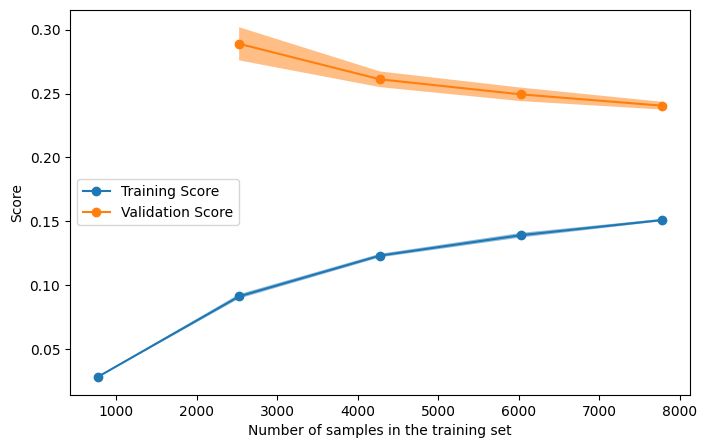

In [298]:
# Set figure size
fig, ax = plt.subplots(figsize=(8, 5))

mape_learning = make_scorer(mean_absolute_percentage_error)

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "scoring": mape_learning
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(final_model, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='center left')

# Show the plot
plt.show()

**Performa pada Data Train Set (Training Score):**
- Skor pada train set secara konsisten meningkat (kesalahan menurun) seiring dengan bertambahnya jumlah sampel di train set.
- Peningkatan score menunjukkan bahwa model mampu menangkap lebih banyak pola dari data Train set saat ukuran dataset meningkat.
- Kurva ini cenderung mendatar setelah sekitar 6000 sampel, menunjukkan bahwa penambahan data Train set lebih lanjut mungkin tidak akan memberikan peningkatan signifikan dalam skor Train set.
- Namun, _Training Score_ lebih rendah dari _validation score_, artinya bahwa model belum sepenuhnya mampu menangkap kompleksitas data bahkan dengan lebih banyak data.

**Performa pada Data Validasi (Cross Validation Score):**
- Kurva validasi dimulai dengan error yang lebih tinggi dan menurun seiring bertambahnya data, tetapi tidak turun sebanyak kurva Train set, kemudian stabil pada ukuran dataset yang lebih besar.
- Kurva validasi mendekati kurva Train set saat jumlah sampel bertambah, meskipun masih ada sedikit jarak di antara keduanya.

**High Variance (Overfitting) vs. High Bias (Underfitting):**
- Kurva _training_ menunjukkan skor yang lebih baik (lebih rendah) daripada kurva validasi, dengan jarak yang relatif konsisten antara keduanya. Hal ini bisa menjadi indikasi adanya overfitting, terutama pada awal Train set.
- Namun, karena kurva validasi terus menurun dan mendekati kurva Train set saat lebih banyak _samples_ yang digunakan, ini menunjukkan bahwa penambahan data Train set dapat membantu memperbaiki performa model.

#### 8. Feature Importance

,feature,importances
10,hr,0.456354
6,season_Winter,0.148081
7,year,0.095132
9,day,0.082539
12,temp,0.063554
0,holiday_Yes,0.039098
2,weathersit_Ringan,0.036739
1,weathersit_Normal,0.023230
8,month,0.022462
11,hum,0.017314


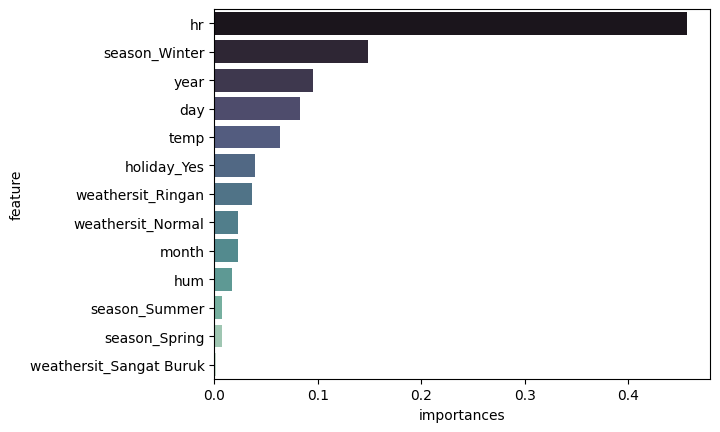

In [299]:
onehot_features = list(final_model[0].transformers_[0][1].get_feature_names_out())
remainder_features = list(X[final_model[0].transformers_[1][2]])

feature_names = onehot_features + remainder_features

df_coef = pd.DataFrame({
    "feature" : feature_names, 
    "importances" : final_model['model'].regressor_.feature_importances_
}).sort_values(by='importances', ascending=False)
display(df_coef)

sns.barplot(data=df_coef, x='importances', y='feature', saturation=0.5, palette='mako')
plt.show()

**Fitur yang Paling Penting:**
- `hr` (jam) adalah fitur yang paling signifikan dengan nilai importance tertinggi ($0,4607$). Hal ini menunjukkan bahwa jam tertentu memiliki pengaruh besar terhadap target atau variabel prediksi. Ada pola kuat dalam data yang terkait dengan waktu tertentu dalam sehari, yaitu jam pergi/pulang kerja.
- `season_Winter` (musim dingin) juga memiliki nilai importance tertinggi kedua ($0.1476$). Hal ini menunjukkan bahwa musim dingin memiliki dampak pada hasil yang diprediksi.
- [`year`](#c.-kolom-year-vs-cnt) (tahun), dari hasil data analysis jumlah sepeda yang disewa naik seiring bertambahnya tahun, sehingga, tahun memiliki dampak pada hasil yang diprediksi.
- `day` (hari) adalah fitur penting lainnya, menunjukkan bahwa hari tertentu juga memainkan peran penting dalam prediksi model.

**Fitur dengan Pentingnya Sedang:**
- Fitur seperti `temp` (suhu), `weathersit_Ringan` (cuaca ringan), dan `holiday_Yes` (hari libur) memiliki nilai importance menengah. Ini menunjukkan bahwa meskipun mereka tidak sekuat fitur utama seperti `hr`, mereka masih berkontribusi dalam model.
- Fitur ini mungkin mempengaruhi secara moderat bagi keputusan model, tergantung pada kondisi spesifiknya.

**Fitur yang Kurang Penting:**
F
itur seperti hum (kelembapan), season_Spring (musim semi), season_Summer (musim panas), dan weathersit_Sangat Buruk (cuaca sangat buruk) memiliki nilai importance yang sangat rendah. Ini menunjukkan bahwa fitur-fitur ini memiliki dampak minimal pada prediksi model.

#### 9. Residual Plot

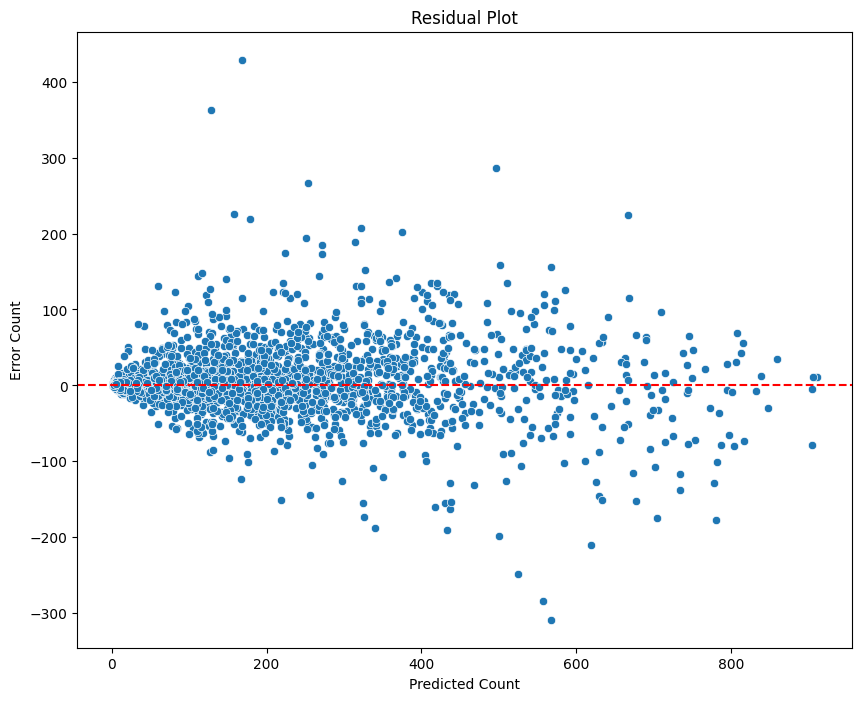

In [300]:
residual = y_test - y_pred

plt.figure(figsize=(10, 8))

# Scatter plot of residuals
sns.scatterplot(x=y_pred, y=residual).set(
    title='Residual Plot', 
    xlabel='Predicted Count', 
    ylabel='Error Count'
)

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

**Distribusi Residual:**
- Residual tampak tersebar di sekitar garis horizontal nol. Ini menunjukkan bahwa model tidak memiliki bias sistematis yang kuat dalam prediksi, tetapi ada beberapa outliers atau error yang cukup besar.
- Namun, ada tanda-tanda pola heteroskedastisitas (penyebaran residual yang tidak merata) di mana variabilitas residual meningkat seiring dengan peningkatan nilai yang diprediksi.

**Pola Spread Residual:**
- Residual tampak lebih menyebar ketika nilai prediksi meningkat, yang bisa menunjukkan bahwa model cenderung kurang akurat atau lebih bervariasi saat memprediksi nilai yang lebih tinggi. ITerdapat indikasi bahwa model tidak sepenuhnya menangkap kompleksitas pada nilai yang lebih tinggi.

**Outliers:**
Ada beberapa titik data yang jauh dari garis nol, menunjukkan error yang sangat besar untuk prediksi tersebut.

#### 10. Actual vs Predicted Probability / Model Performance vs Prediction

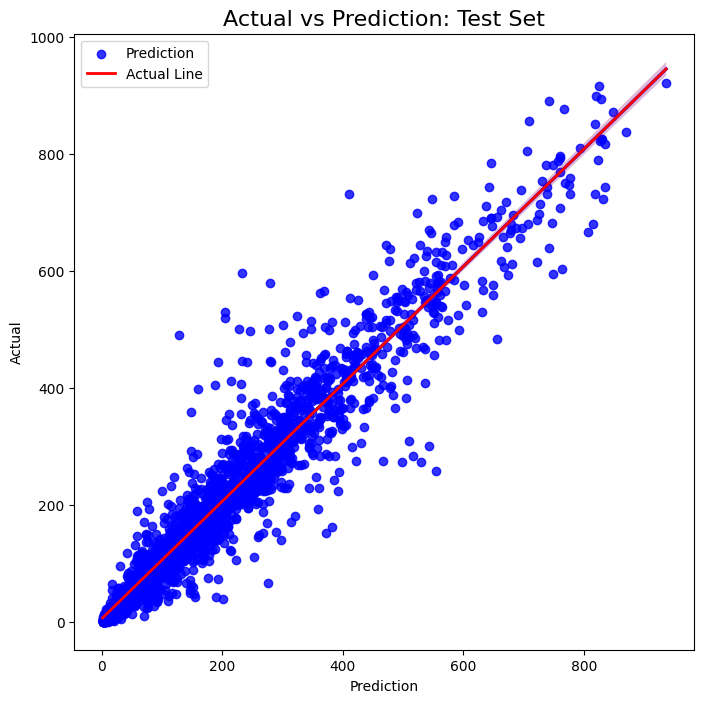

In [301]:
plt.figure(figsize=(8,8))

sns.regplot(y=y_test, x=y_pred_best, color='blue', label='Prediction')
sns.regplot(y=y_test, x=y_pred_best, line_kws = {'linewidth': 2}, scatter=False, color='red', label='Actual Line')

plt.title('Actual vs Prediction: Test Set', fontsize=16)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.legend()
plt.show()

**Sebaran Titik-titik Data:**
- Sebagian besar titik-titik data berada di sekitar garis diagonal, yang menunjukkan bahwa model umumnya menghasilkan prediksi yang cukup akurat. Sebaran yang relatif rapat di sekitar garis ini menunjukkan performa yang baik.
- Beberapa titik menyebar lebih jauh dari garis diagonal, terutama pada nilai yang lebih tinggi, menunjukkan adanya beberapa prediksi yang memiliki kesalahan yang lebih besar.

**Linearitas:**
- Pola titik yang mengikuti garis diagonal menunjukkan bahwa model menangkap hubungan linear antara fitur dan target dengan baik. Namun, ada beberapa penyimpangan (nilai prediksi yang sangat tinggi atau sangat rendah), yang menunjukkan bahwa ada beberapa variasi yang tidak dijelaskan dengan baik oleh model.

**Potensi Outliers atau Variabilitas:**
- Beberapa titik yang jauh dari garis diagonal bisa menjadi outliers atau hasil dari variabilitas yang tidak dijelaskan oleh model.

#### 11. Model Limitation

In [302]:
evaluation_df = pd.DataFrame({
    'actual value': y_test.reset_index(drop=True),
    'predicted value': y_pred
})

In [303]:
def segmentation(x):
    if x <= 50:
        return '<50'
    elif x <= 100:
        return '51-100'
    elif x <= 150:
        return '101-150'
    elif x <= 200:
        return '151-200'
    elif x <= 250:
        return '201-250'
    elif x <= 300:
        return '251-300'
    elif x <= 350:
        return '301-350'
    elif x <= 400:
        return '351-400'
    elif x <= 450:
        return '401-450'
    elif x <= 500:
        return '451-500'
    elif x <= 550:
        return '501-550'
    elif x <= 600:
        return '551-600'
    else:
        return '>600'
    
evaluation_df['group'] = evaluation_df['predicted value'].apply(segmentation)

In [304]:
label = ['<50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', 
          '351-400', '401-450', '451-500', '501-550', '551-600', '>600']

In [305]:
score = []
for group in label:
    data_ev = evaluation_df[evaluation_df['group']==group]
    mape = mean_absolute_percentage_error(data_ev['actual value'], data_ev['predicted value'])
    score.append(mape)

mape_df = pd.DataFrame({
    'group': label,
    'mape': score
})

mape_df

,group,mape
0,<50,0.451227
1,51-100,0.257209
2,101-150,0.215507
3,151-200,0.168058
4,201-250,0.141724
5,251-300,0.139514
6,301-350,0.130253
7,351-400,0.092196
8,401-450,0.142461
9,451-500,0.105551


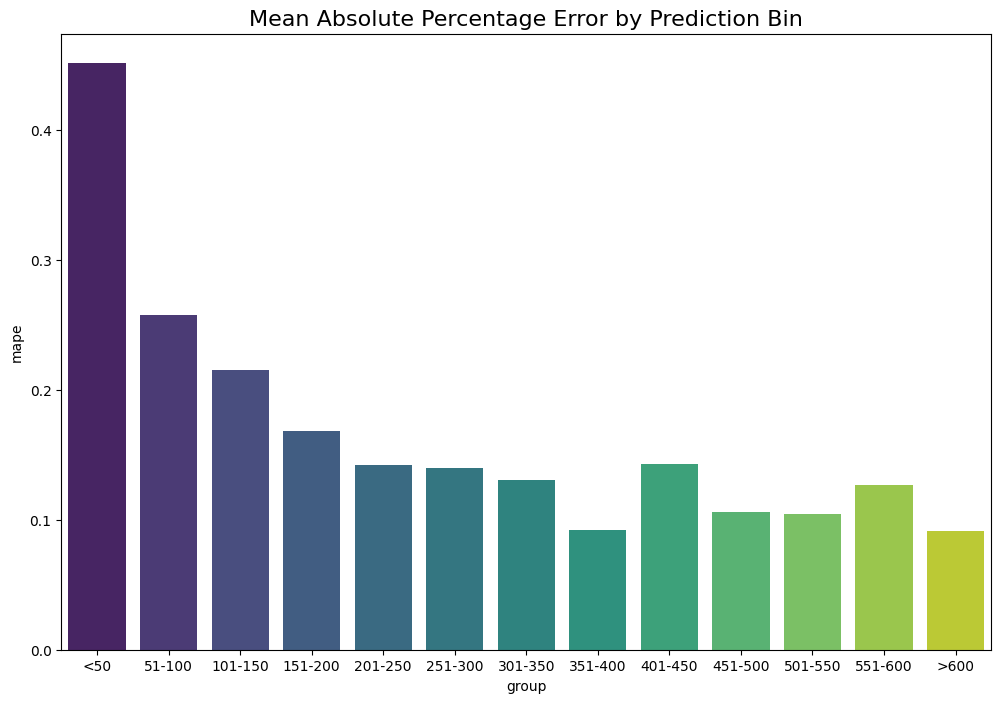

In [306]:
plt.figure(figsize=(12,8))
sns.barplot(data=mape_df, x='group', y='mape', palette='viridis')
plt.title('Mean Absolute Percentage Error by Prediction Bin', size=16)
plt.show()

Insight model:
- Grup <50 memiliki MAPE tertinggi: Ini menunjukkan bahwa prediksi dalam kelompok ini memiliki kesalahan terbesar secara persentase. Model kurang efektif dalam memprediksi nilai yang sangat rendah.
- Penurunan MAPE Secara Umum Saat Prediksi Meningkat:
    - Setelah grup <50, MAPE menurun secara bertahap dari grup 51-100 hingga 251-300, yang menunjukkan bahwa prediksi model lebih akurat untuk rentang nilai yang lebih tinggi.
    - Setelah penurunan awal, MAPE tetap relatif stabil dengan sedikit fluktuasi untuk kelompok selanjutnya (301-350 hingga >600).
- Model akan baik memprediksi pada grup 251-300 sampai >600 dengan nilai MAPE (Persentasi absolut dari rata-rata error) dibawah 0.15 (15%)

In [307]:
display(data.describe(), data.describe(include='object'))

,dteday,year,month,day,hr,hum,temp,atemp,casual,registered,cnt
count,12151,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000
mean,2012-01-01 10:17:40.060900352,2011.502510,6.515019,3.005267,11.519875,0.626172,0.498313,0.477101,35.873426,153.583903,189.457329
min,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.000000,0.080000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 00:00:00,2011.000000,4.000000,1.000000,6.000000,0.480000,0.340000,0.333300,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,2012.000000,7.000000,3.000000,12.000000,0.620000,0.500000,0.484800,17.000000,115.000000,142.000000
75%,2012-07-03 00:00:00,2012.000000,9.000000,5.000000,18.000000,0.780000,0.660000,0.621200,49.000000,220.000000,282.000000
max,2012-12-31 00:00:00,2012.000000,12.000000,6.000000,23.000000,1.000000,1.000000,1.000000,362.000000,876.000000,970.000000
std,NaN,0.500014,3.433903,1.994141,6.932187,0.191036,0.192562,0.171922,49.504421,151.068070,181.242898


,holiday,weathersit,season
count,12151,12151,12151
unique,2,4,4
top,No,Normal,Summer
freq,11789,8071,3169


Model hanya valid untuk input:

- `dteday` : antara 01-01-2011 sampai 31-12-2012
- `hr` : antara 0 sampai 23 (integer)
- `hum` : antara 0.08 sampai 1
- `temp` : 0 sampai 1
- `holiday` : Yes atau No
- `weathersit` : Normal, Ringan, Buruk, Sangat Buruk
- `season` : Summer, Fall, Winter, Spring

---

# Conclusion and Recomendation

#### 1. Conclusion

Tujuan utama dari analisis ini adalah memprediksi permintaan penggunaan layanan bike sharing berdasarkan variabel-variabel seperti cuaca, musim, hari dalam seminggu, kondisi cuaca, dan faktor lain yang mempengaruhi penggunaan sepeda. Model XGBoost Regressor menunjukkan performa terbaik dalam memprediksi data dibandingkan dengan model LGBM dan Random Forest Regressor, terutama setelah dilakukan tuning hyperparameter. Dengan demikian, model ini direkomendasikan untuk digunakan dalam konteks prediksi ini, mengingat hasil evaluasi yang lebih baik dibandingkan dengan model lain.

Hyperparameter tuning dilakukan untuk meningkatkan performa model XGBoost Regressor dengan menggunakan teknik RandomizedSearchCV. Parameter optimal yang ditemukan adalah:
- colsample_bytree: 1.0
- learning_rate: 0.08
- max_depth: 6
- n_estimators: 250
- reg_alpha: 0.01
- subsample: 0.89

Setelah tuning, model XGBoost Regressor menunjukkan peningkatan performa dengan MAPE pada train set sebesar -0.2366, yang menunjukkan bahwa model tersebut mampu memberikan prediksi yang lebih akurat. Walaupun begitu, masih ada error yang cukup tinggi dari model. Model akan lebih akurat memprediksi pada target yang lebih besar (>250) dengan error dibawah 15%. LGBM Regressor juga menunjukkan performa yang hampir setara dengan XGBoost, menjadikannya alternatif yang baik terutama jika waktu komputasi atau efisiensi sumber daya menjadi pertimbangan penting.

#### 2. Recommendation

##### A. Model

1. Penambahan Fitur Eksternal yang Relevan

- Cuaca Lebih Detail: Meskipun dataset sudah menyertakan beberapa variabel cuaca (seperti suhu, kelembapan, dan kondisi cuaca), menambahkan fitur lain seperti data curah hujan, kecepatan angin, dan polusi udara dapat meningkatkan akurasi prediksi.
- Event Lokal atau Musiman: Memasukkan data tentang event atau acara lokal, hari libur, dan pola musiman yang spesifik pada lokasi tertentu (seperti festival, acara olahraga, atau liburan sekolah) dapat membantu dalam memahami lonjakan atau penurunan permintaan.
- Data Ekonomi dan Mobilitas: Menambahkan data ekonomi (seperti tingkat pengangguran atau pendapatan rata-rata) dan data mobilitas (seperti penggunaan transportasi umum atau lalu lintas kendaraan) dapat memperkaya model dalam menangkap faktor-faktor eksternal yang mempengaruhi penggunaan layanan _bike sharing_.

2. Eksplorasi Teknik Feature Engineering
- Interaksi Fitur: Buat fitur baru yang merupakan interaksi antara beberapa variabel yang ada, seperti interaksi antara suhu dan kelembapan, atau antara hari dalam seminggu dan kondisi cuaca. Fitur-fitur ini bisa membantu model menangkap hubungan non-linear dalam data.
- Transformasi Waktu: Tambahkan fitur-fitur terkait waktu yang lebih detail, seperti pembagian waktu berdasarkan jam puncak (morning rush hour, evening rush hour), akhir pekan vs hari kerja, atau hari libur vs hari biasa. Ini dapat meningkatkan kemampuan model untuk menangkap pola musiman dan siklus harian.
- Lag Features: Buat fitur lag untuk menangkap ketergantungan permintaan berdasarkan waktu. Misalnya, permintaan penggunaan bike sharing pada hari sebelumnya, seminggu sebelumnya, atau bulan sebelumnya.
- Forecasting: Meramal jumlah sepeda yang disewa menggunakan time series forcasting untuk mengatasi limitasi model `year` (2011-2012).

3. Penambahan Variabel Kategorikal yang Lebih Detail
- Cluster Analysis untuk Lokasi: Jika data lokasi tersedia, pertimbangkan untuk membuat cluster atau grup area berdasarkan tingkat permintaan atau karakteristik lainnya. Cluster ini bisa ditambahkan sebagai variabel kategorikal baru untuk membantu model menangkap perbedaan spasial dalam permintaan.
- Segmentasi _customer_: Tambahkan segmentasi _customer_ berdasarkan pola perilaku, seperti frekuensi penggunaan atau preferensi waktu, untuk menangkap variasi dalam kelompok _customer_.

Fokus utama dalam meningkatkan pemodelan dataset bike sharing ini adalah memperkaya dataset dengan fitur yang lebih relevan, mengeksplorasi model yang lebih kompleks, meningkatkan teknik preprocessing, dan memanfaatkan metode interpretasi model.

##### B. Business

1. Pengoptimalan Sumber Daya

Dengan menggunakan model XGBoost Regressor, perusahaan dapat memprediksi permintaan penggunaan sepeda dengan lebih akurat, sehingga memungkinkan alokasi sumber daya (seperti jumlah sepeda yang tersedia di setiap stasiun) yang lebih efisien. Hal ini akan mengurangi biaya operasional seperti perawatan sepeda dan logistik, serta meningkatkan kepuasan _customer_ dengan mengurangi kelangkaan sepeda di waktu puncak.

2. Personalisasi Penawaran Layanan

Memanfaatkan prediksi permintaan, perusahaan dapat mengembangkan penawaran yang lebih disesuaikan dengan kebutuhan _customer_. Misalnya, menawarkan diskon atau promosi khusus pada hari atau waktu tertentu dengan permintaan rendah untuk mendorong penggunaan layanan yang lebih merata.

3. Ekspansi Pasar

Model ini juga dapat digunakan untuk mengidentifikasi peluang pasar baru. Misalnya, dengan menganalisis data permintaan di area tertentu, perusahaan dapat mengidentifikasi daerah yang memiliki potensi penggunaan tinggi tetapi saat ini kurang dilayani, sehingga mendukung keputusan strategis untuk ekspansi atau penambahan stasiun baru.

4. Mitigasi Risiko

Prediksi yang lebih akurat tentang permintaan penggunaan bike sharing dapat membantu dalam perencanaan mitigasi risiko. Misalnya, dalam menghadapi kondisi cuaca buruk atau situasi lain yang memengaruhi penggunaan sepeda, perusahaan dapat menyesuaikan strategi operasional mereka secara proaktif.

---

# SAVE MODEL

In [310]:
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['holiday', 'weathersit',
                                                   'season']),
                                                 ('Transformation',
                                                  PowerTransformer(),
                                                  ['year', 'month', 'day', 'hr',
                                                   'hum', 'temp'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=XGBRegressor(bas...
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.08,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=250,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=0, ...)))])

In [311]:
# Define final model
final_model = tuned_xgb.best_estimator_

# Fitting model to all data
final_model.fit(X, y)

# Save Model
pickle.dump(final_model, open('xgboost_bike_sharing.sav', 'wb'))

---